In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
import seaborn as sns
import scrublet as scr
import bbknn as bk
%matplotlib inline

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sc.settings.set_figure_params(dpi=250,fontsize=10)

In [4]:
adata = sc.read_h5ad("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Test/Test2_nolog/bin50_D2-2.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 17214 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor'
    var: 'Genes'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata.obs['arterial_ec'] = (adata.X[:,adata.var_names=='GJA5'] > 1) & (adata.X[:,adata.var_names=='VWF'] > 1)

In [7]:
adata_aec = adata[adata.obs['arterial_ec'] == True]

In [8]:
adata_aec

View of AnnData object with n_obs × n_vars = 49 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'arterial_ec'
    var: 'Genes'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
data = adata_aec.obs[['X_coor','Y_coor']]
linkage_data = linkage(data, method='average', metric='euclidean')

In [10]:
temp = dendrogram(linkage_data,no_plot=True)

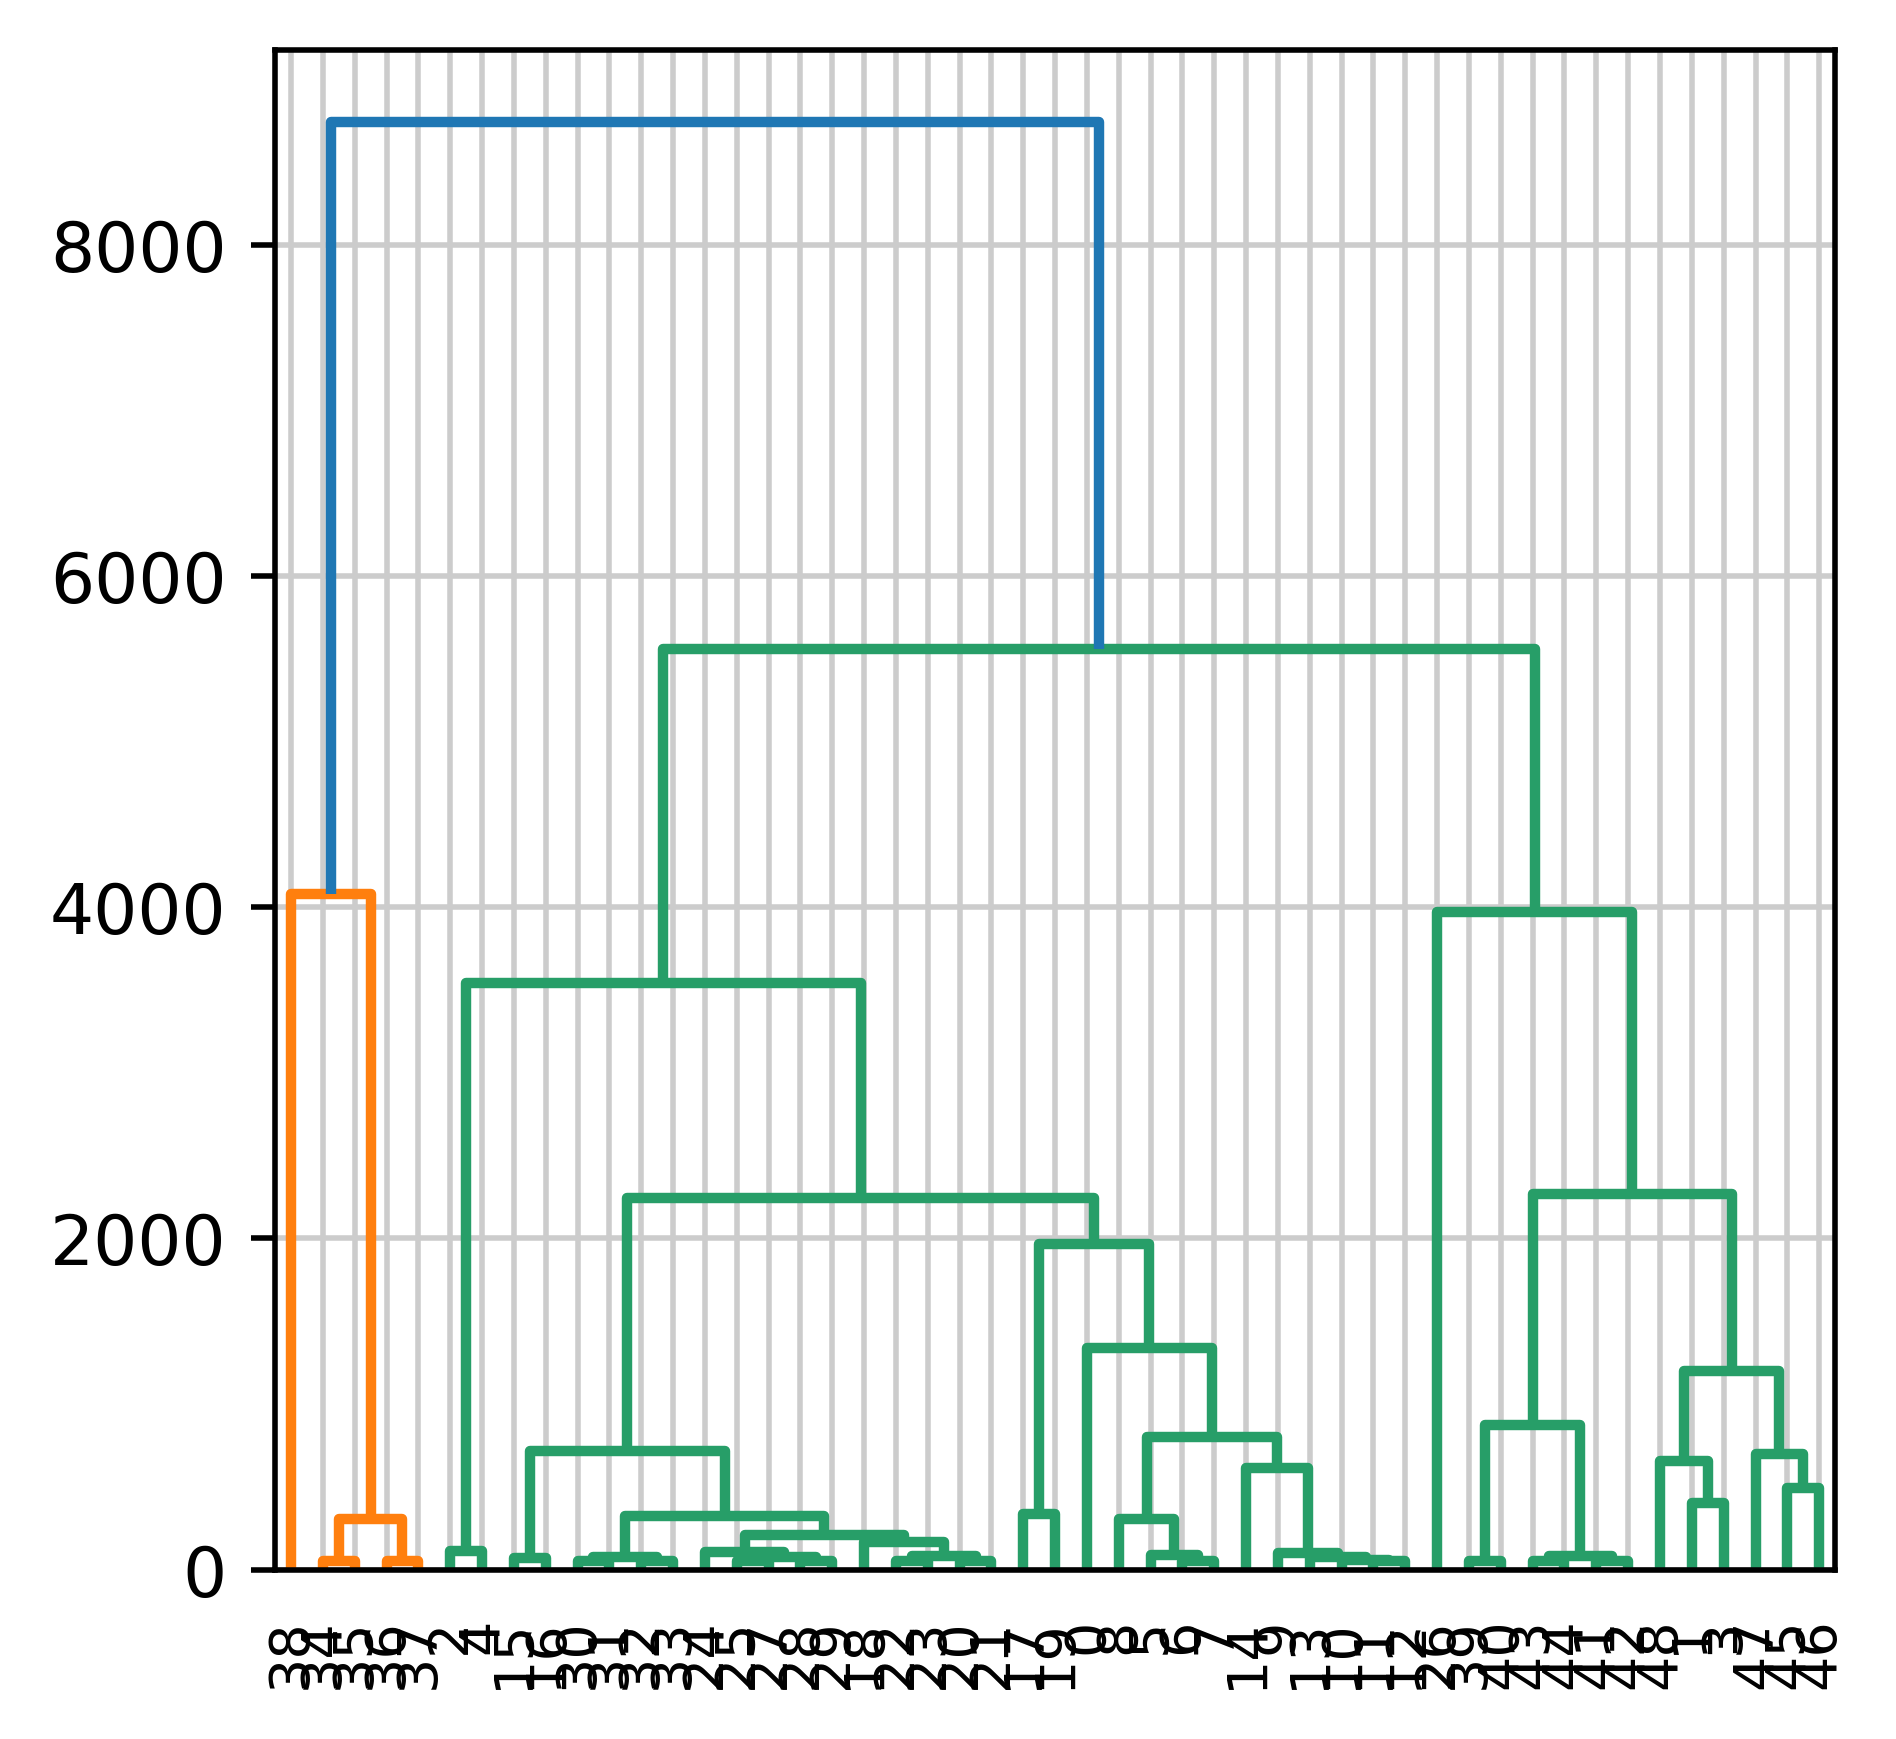

In [11]:
dendrogram(linkage_data)
plt.show()

In [12]:
# adjust n_clusters to relevant number of vessels
hierarchical_cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='single')

In [13]:
labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[10 17  2 16  2  1  1  1  1  7  7  7  7  7 12  6  6 19  3 18  3  3  3  3
  3  3  9  3  3  3  3  3  3  3  0  0  0  0 11  8  8  4  4  4  4 15  5 14
 13]


/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
adata_aec.obs['Artery_clusters'] = labels
adata_aec.obs['Artery_clusters'] = adata_aec.obs['Artery_clusters'].astype('category')

/var/tmp/pbs.8217755.pbs/ipykernel_3432183/2590496195.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_aec.obs['Artery_clusters'] = labels
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [15]:
adata_aec.obs['Artery_clusters'].value_counts()

3     14
7      5
0      4
4      4
1      4
2      2
6      2
8      2
14     1
18     1
17     1
16     1
15     1
10     1
13     1
12     1
11     1
9      1
5      1
19     1
Name: Artery_clusters, dtype: int64

In [16]:
# subset for clusters > 5 bins
adata_aec.obs['Artery_clusters'].value_counts()[adata_aec.obs['Artery_clusters'].value_counts() > 5].index.tolist()

[3]

In [17]:
adata_aec_subset = adata_aec[adata_aec.obs.Artery_clusters.isin(adata_aec.obs['Artery_clusters'].value_counts()[adata_aec.obs['Artery_clusters'].value_counts() > 5].index.tolist())]

In [18]:
adata_aec_subset.obs.Artery_clusters = adata_aec_subset.obs.Artery_clusters.astype(str).astype('category')

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


In [19]:
## adata_aec

In [45]:
#sc.pl.spatial(adata,color="VWF",img_key='WGA',size=8, alpha_img = 0.2, vmax = 1)

In [46]:
#sc.pl.spatial(adata,color="GJA5",img_key='WGA',size=8, alpha_img = 0.2, vmax = 1)

In [47]:
#del adata_aec.uns['Artery_clusters_colors']
#del adata_aec_subset.uns['Artery_clusters_colors']

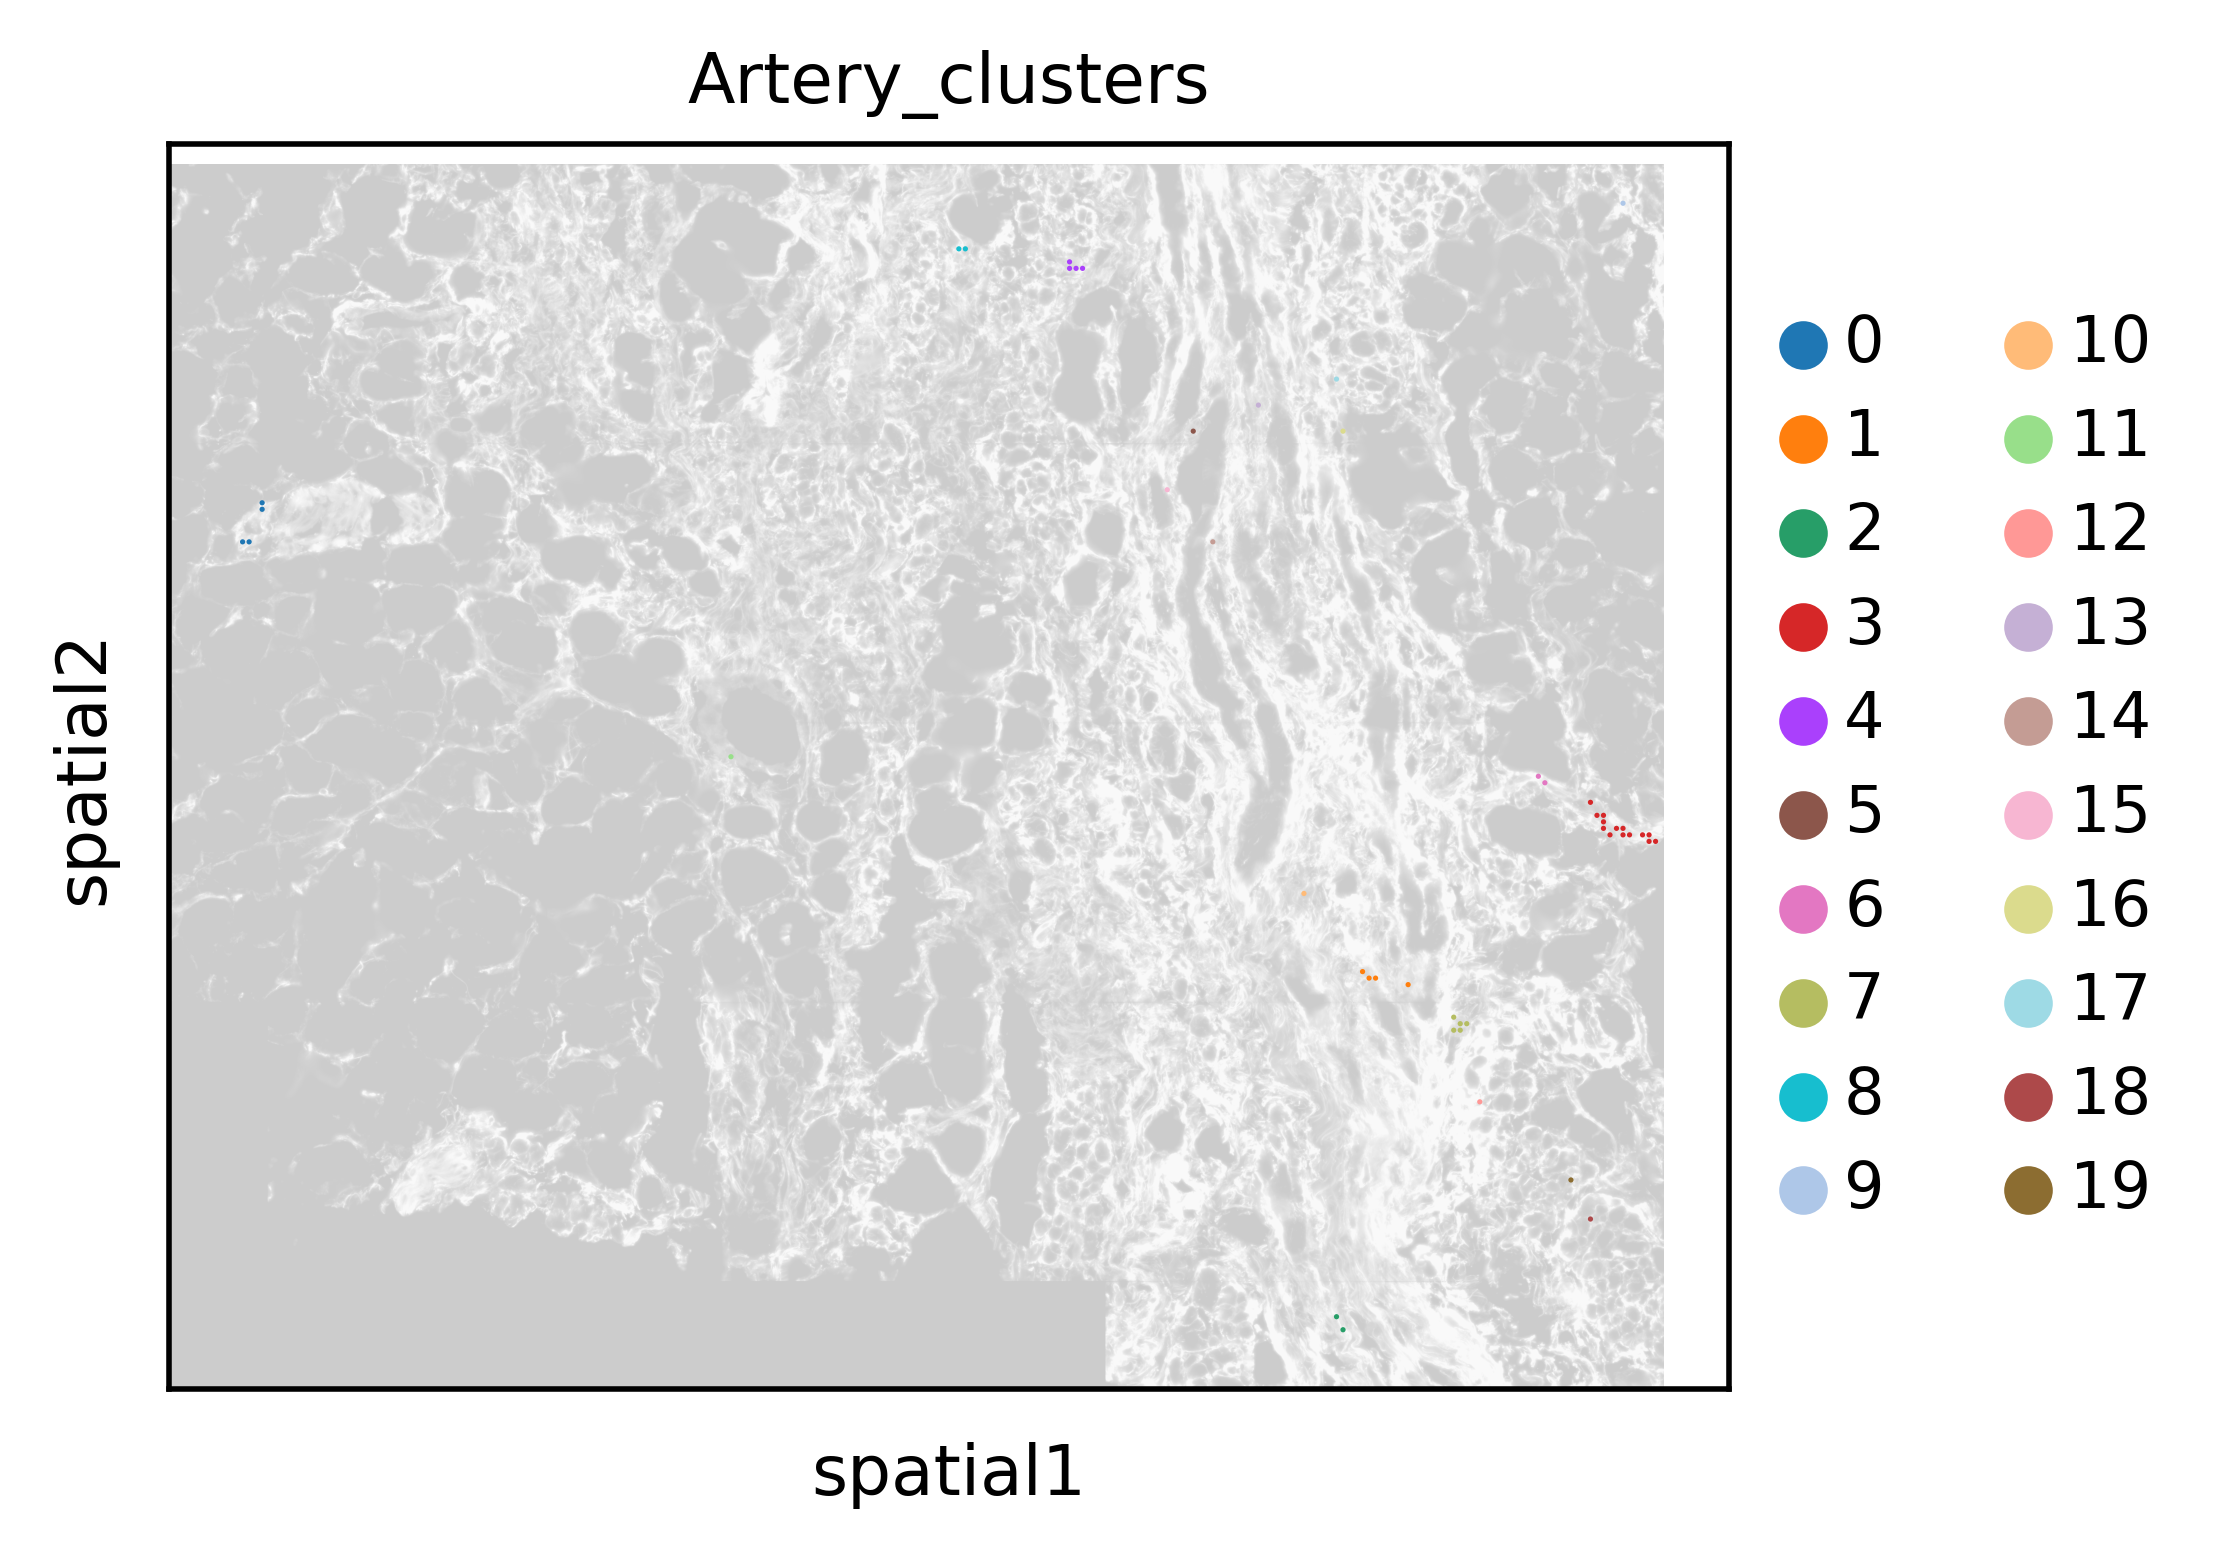

In [48]:
sc.pl.spatial(adata_aec, color="Artery_clusters",img_key='WGA',size=8, alpha_img = 0.2)

In [49]:
#del adata_aec_subset.uns['Artery_clusters_colors']

In [50]:
adata_aec_subset

AnnData object with n_obs × n_vars = 14 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'arterial_ec', 'Artery_clusters'
    var: 'Genes'
    uns: 'spatial'
    obsm: 'spatial'

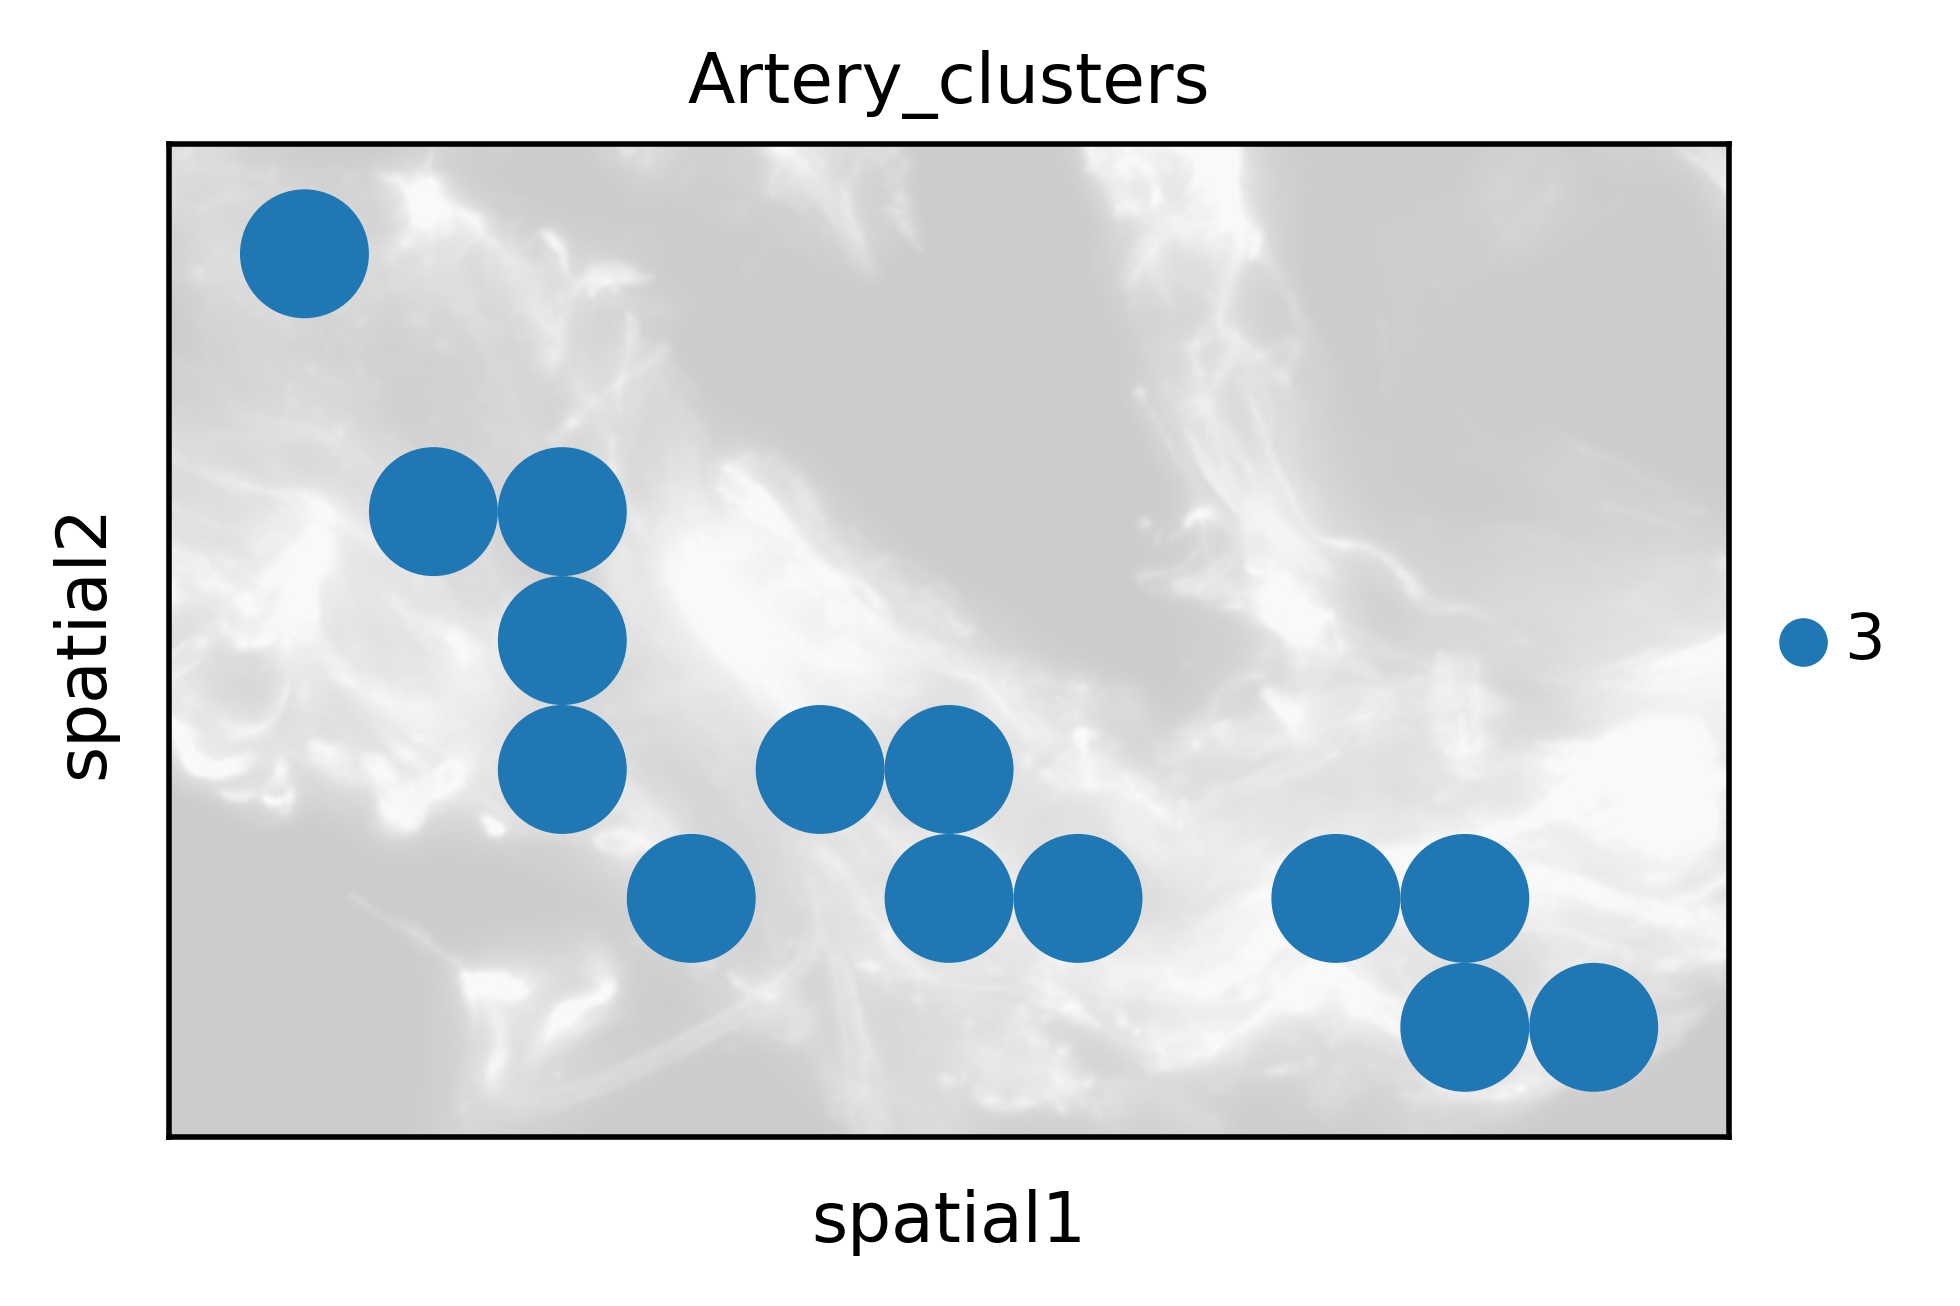

In [51]:
sc.pl.spatial(adata_aec_subset,
              color="Artery_clusters",img_key='WGA',size=10, alpha_img = 0.2)

In [ ]:
#sc.pl.spatial(adata_aec_subset, color="Artery_clusters", groups = ["6","1","12","25","2","13"] ,img_key='WGA',size=10, alpha_img = 0.2)

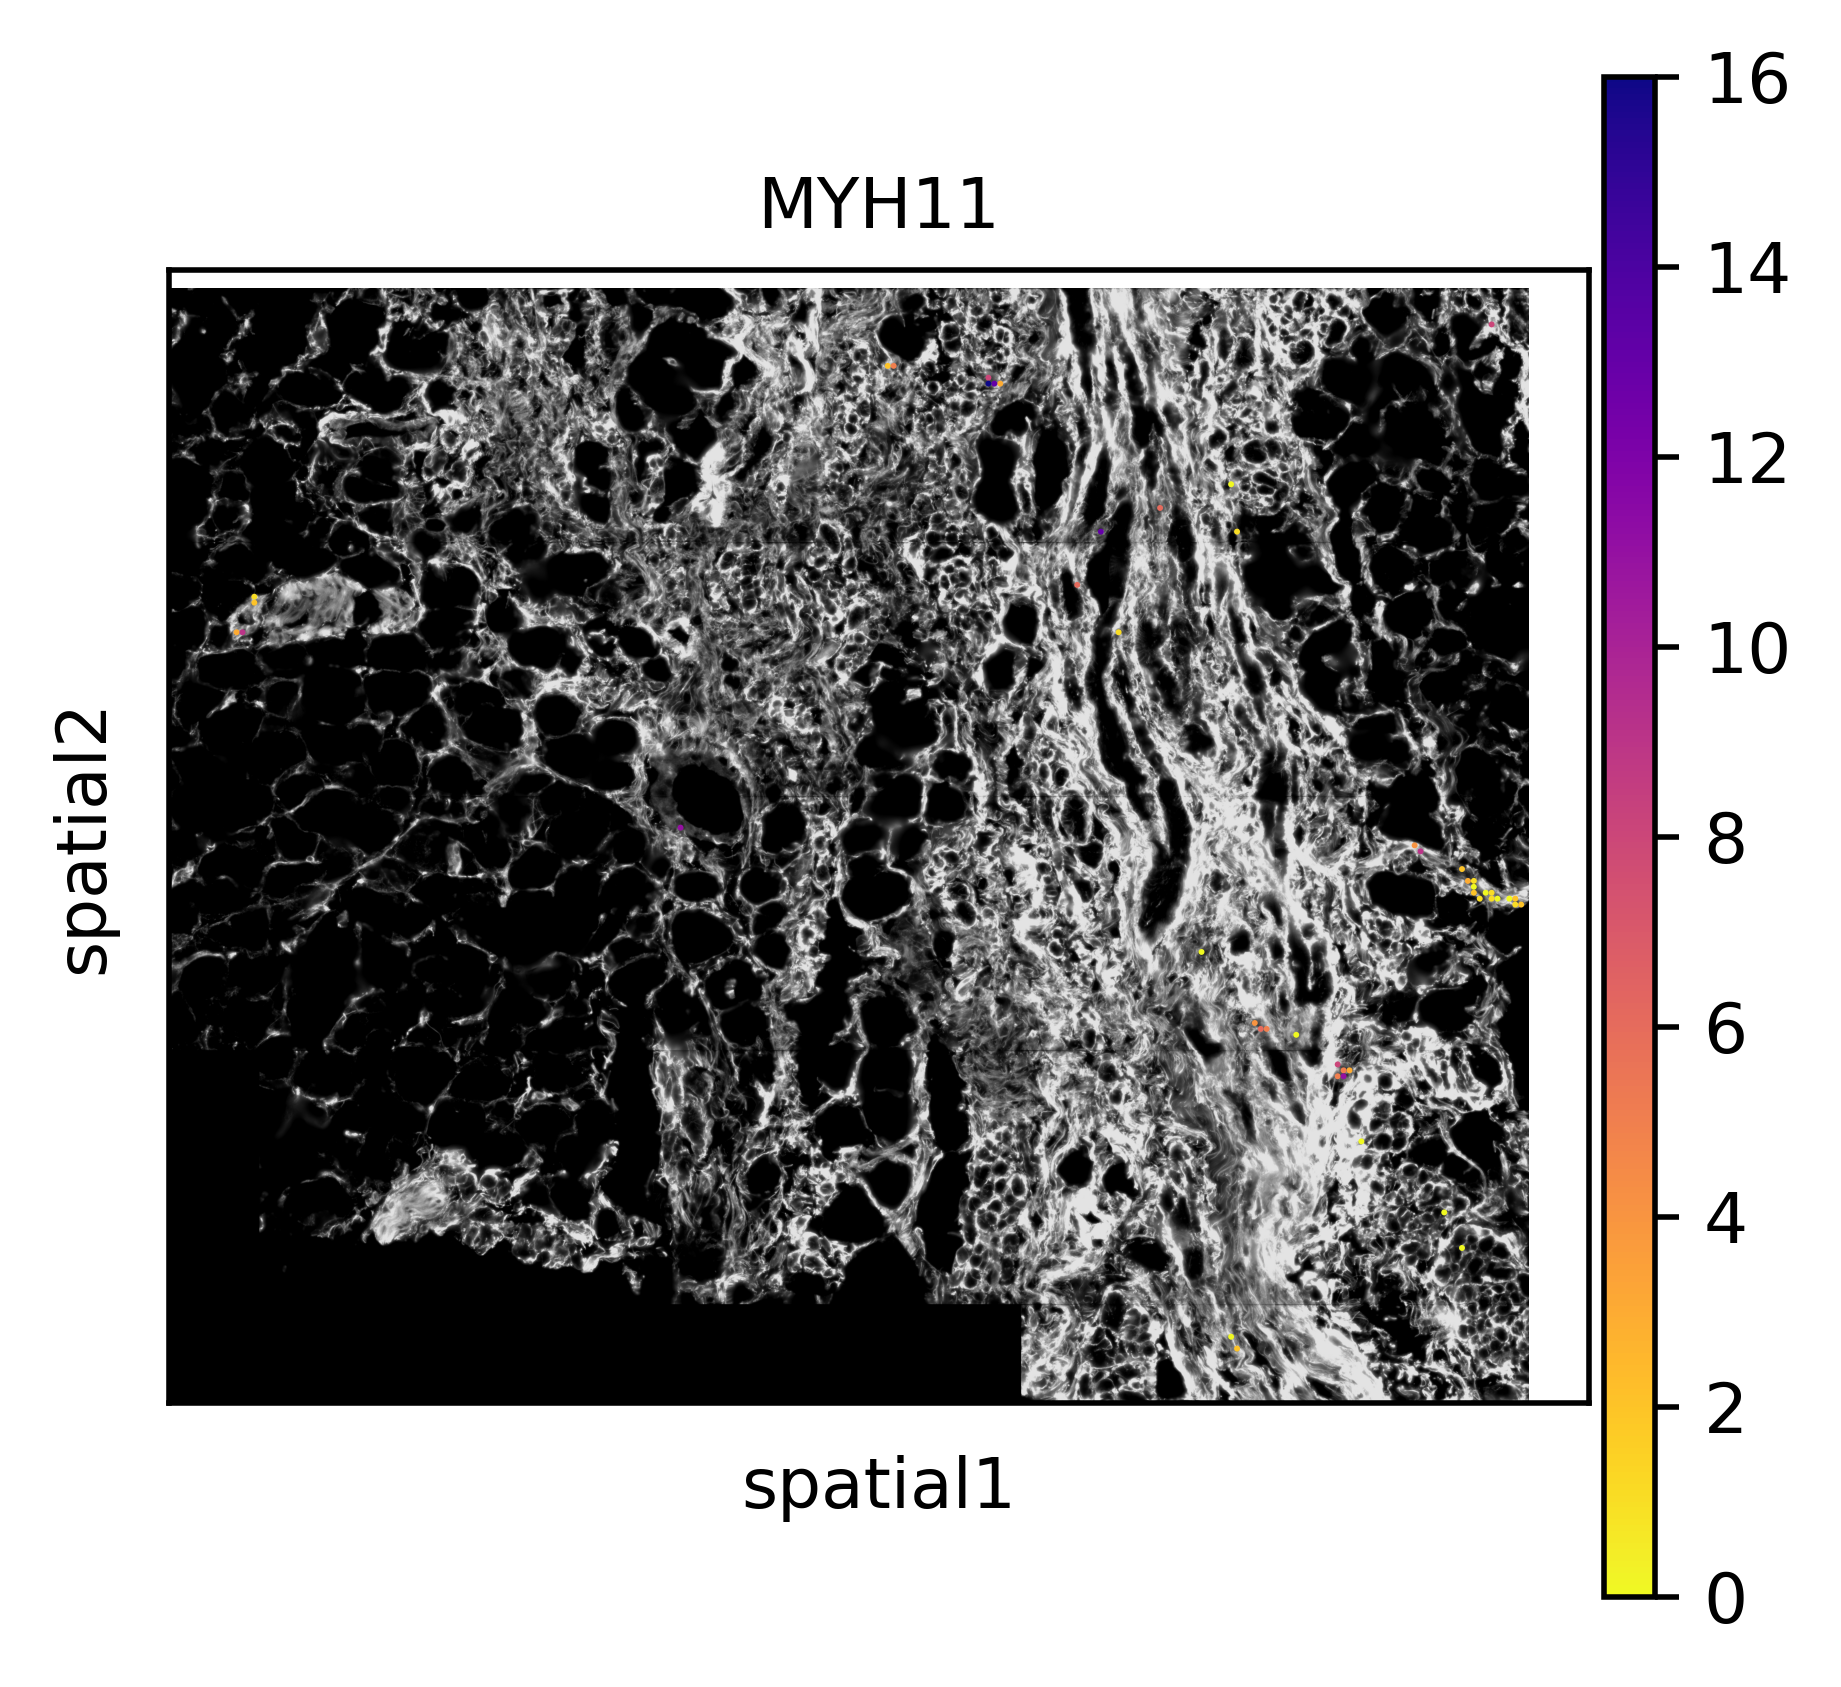

In [54]:
sc.pl.spatial(adata_aec, color="MYH11",img_key='WGA',size=10, alpha_img = 1, cmap = 'plasma_r')

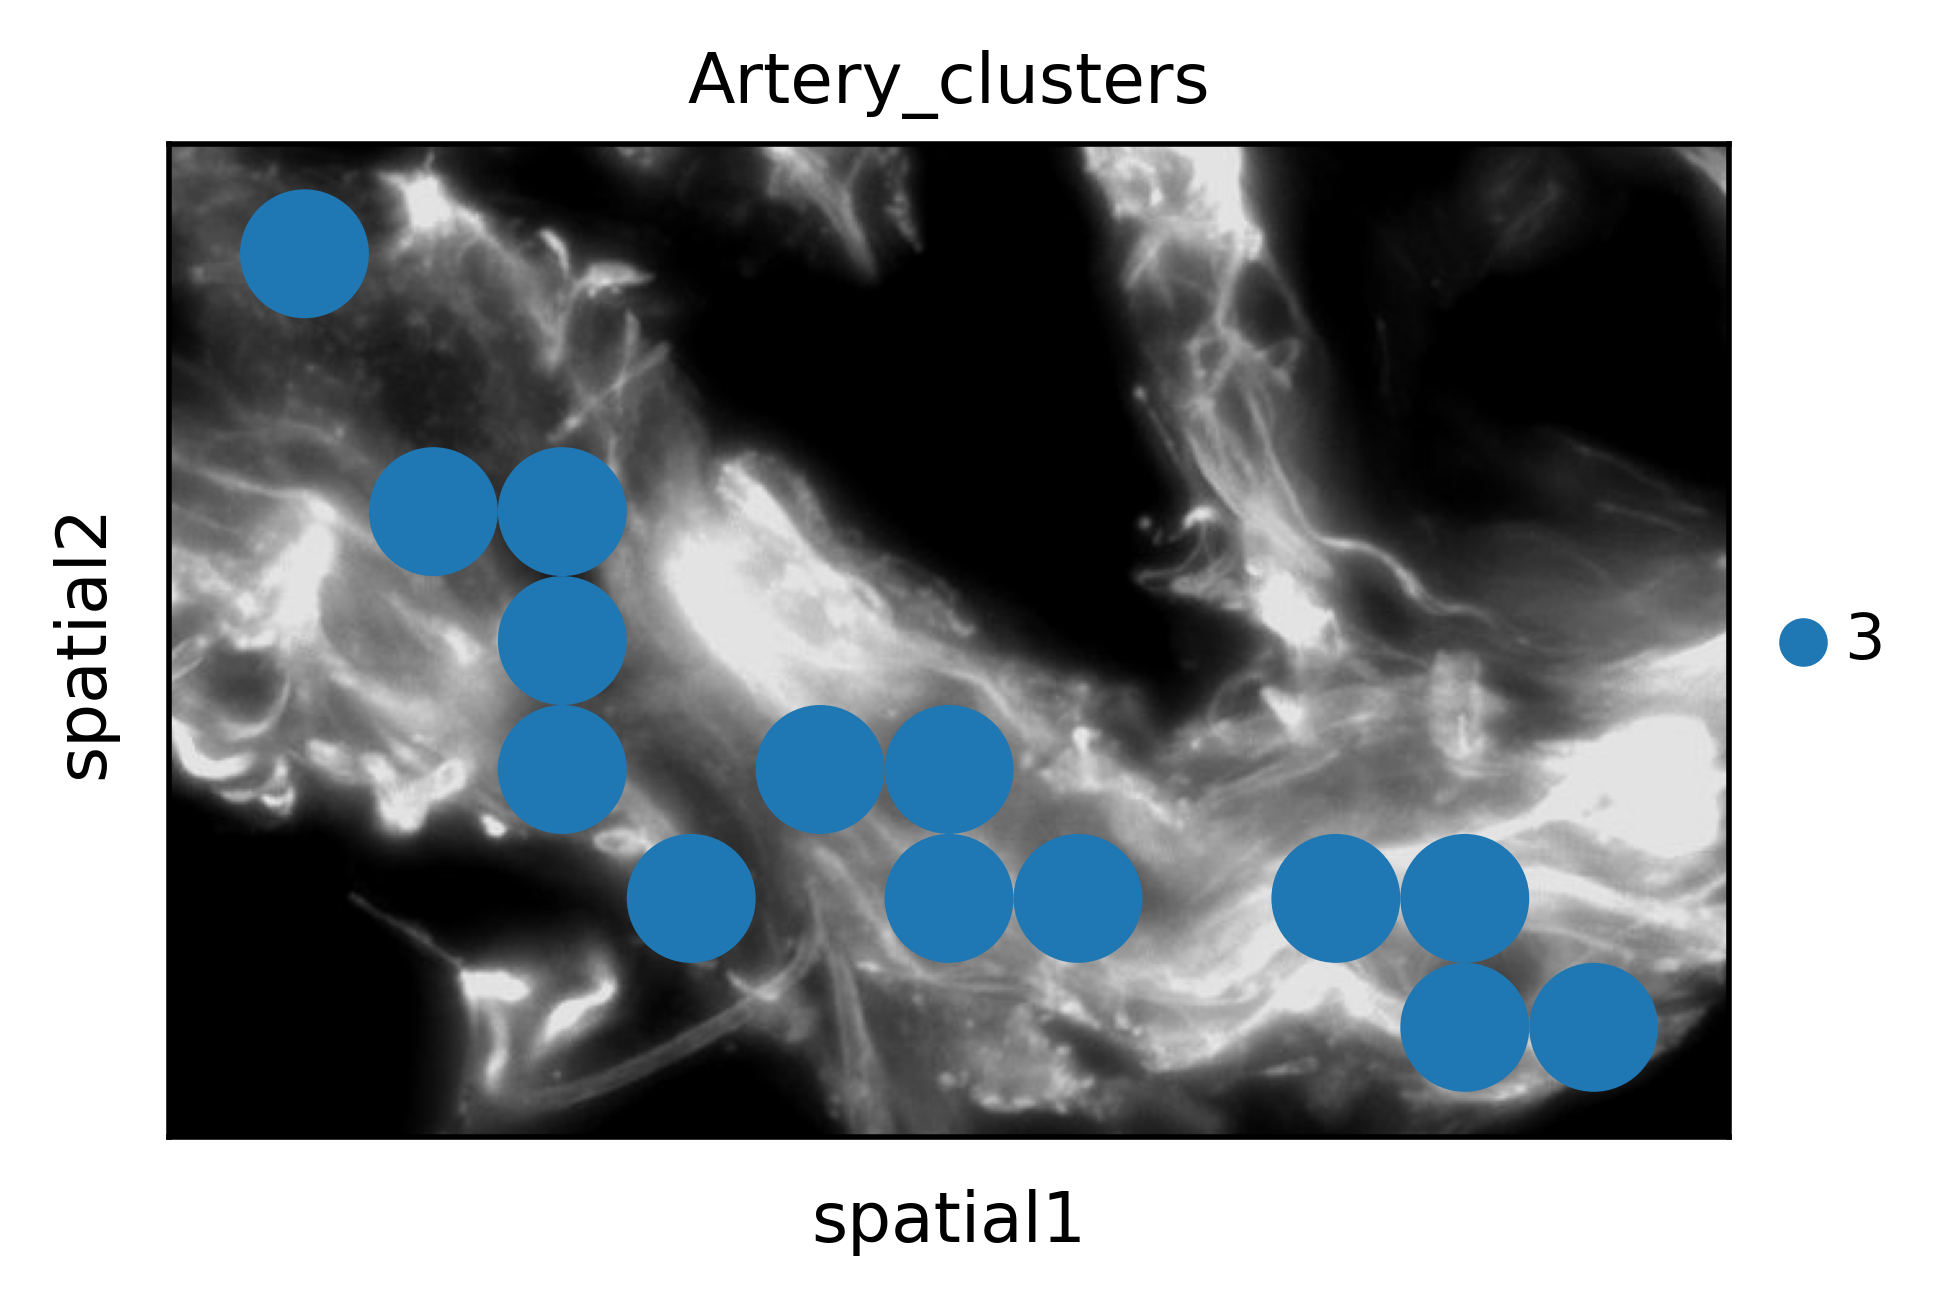

In [52]:
sc.pl.spatial(adata_aec_subset, color="Artery_clusters",img_key='WGA',size=10, alpha_img = 1)

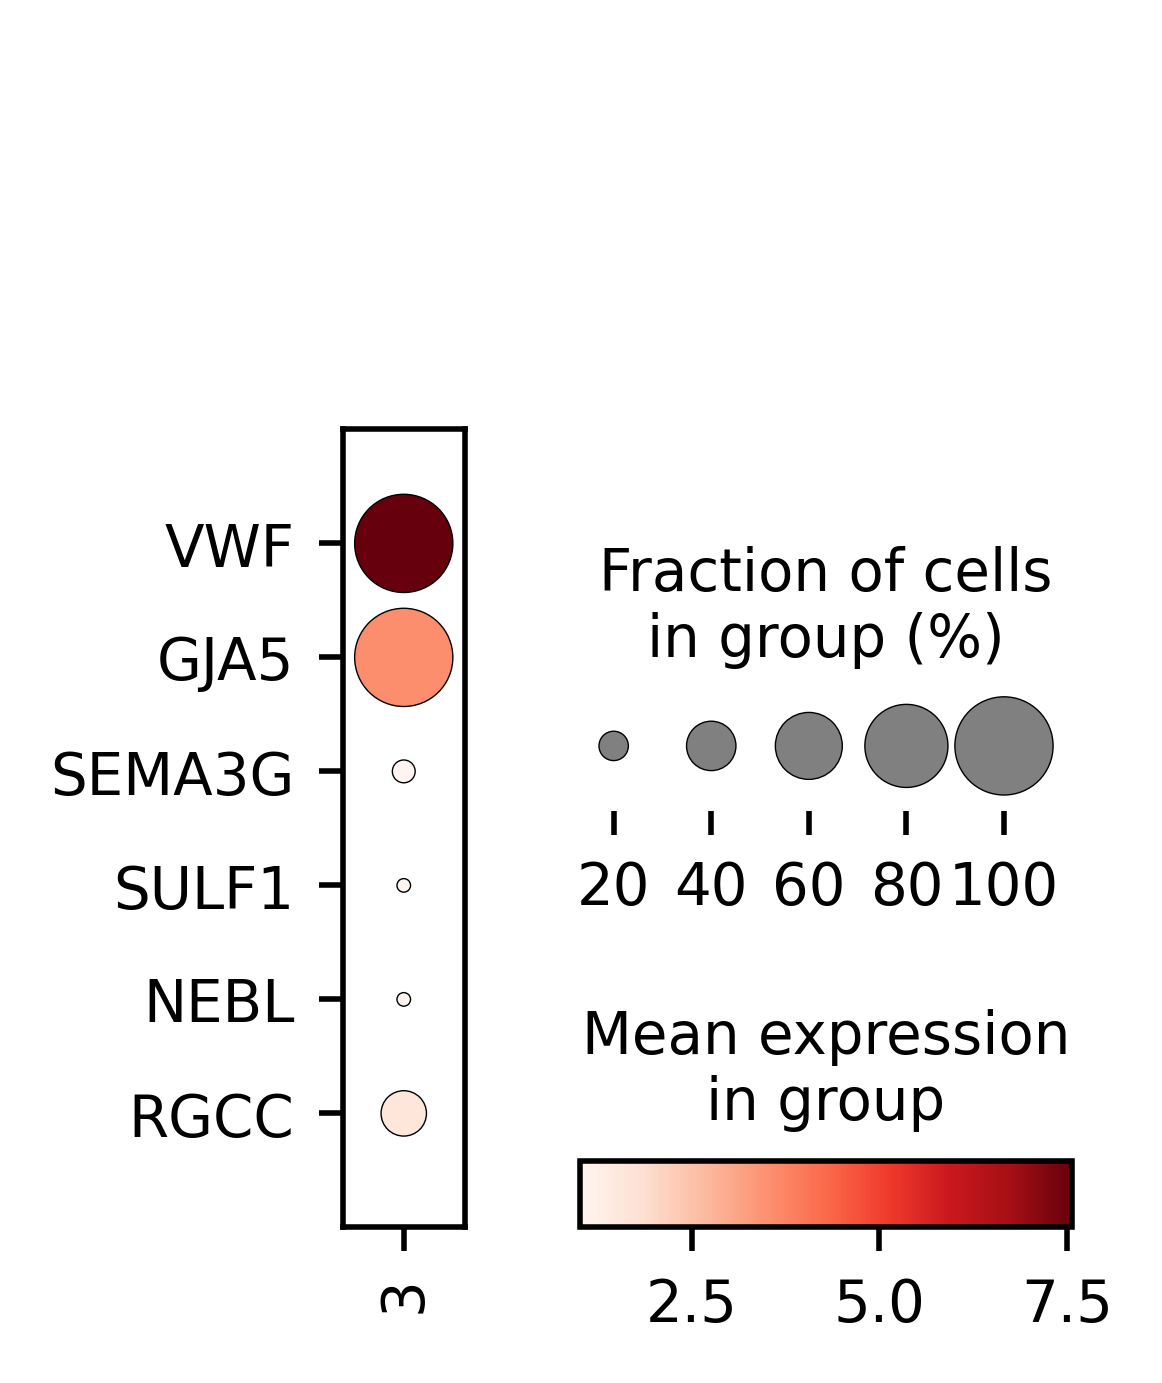

In [53]:
markers = ["VWF","GJA5","SEMA3G","SULF1","NEBL","RGCC"]
sc.pl.dotplot(adata_aec_subset, markers, "Artery_clusters", mean_only_expressed = True, swap_axes = True)
#sc.pl.dotplot(adata_aec_subset, markers, "Artery_clusters", mean_only_expressed = False)

In [ ]:
sc.pl.spatial(adata_aec_subset,
              color="Artery_clusters",img_key='WGA',size=6)

### obtain bins percent expressing values

In [20]:
adata_aec_subset.obs['SULF1_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='SULF1'] > 1)

In [21]:
adata_aec_subset.obs['NEBL_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='NEBL'] > 1)

In [22]:
adata_aec_subset.obs['SEMA3G_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='SEMA3G'] > 0)

In [23]:
adata_aec_subset.obs['RGCC_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='RGCC'] > 0)

In [24]:
adata_aec_subset.obs['SULF1+NEBL_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='SULF1'] > 1) & (adata_aec_subset.X[:,adata_aec_subset.var_names=='NEBL'] > 1)

In [25]:
adata_aec_subset

AnnData object with n_obs × n_vars = 14 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'arterial_ec', 'Artery_clusters', 'SULF1_percent', 'NEBL_percent', 'SEMA3G_percent', 'RGCC_percent', 'SULF1+NEBL_percent'
    var: 'Genes'
    uns: 'spatial'
    obsm: 'spatial'

In [26]:
results = adata_aec_subset.obs[['SULF1+NEBL_percent','SULF1_percent','NEBL_percent','SEMA3G_percent','RGCC_percent','Artery_clusters']].groupby('Artery_clusters').mean()

In [27]:
results

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
3                               0.0            0.0           0.0   

                 SEMA3G_percent  RGCC_percent  
Artery_clusters                                
3                      0.142857      0.357143

### obtain mean expression (all bins / cluster)

In [28]:
matrix=pd.DataFrame(adata_aec_subset.X,columns=adata_aec_subset.raw.var.index,index=adata_aec_subset.obs.index)

In [29]:
matrix["Artery_clusters"] = adata_aec_subset.obs["Artery_clusters"]

In [30]:
df_mean=matrix.groupby("Artery_clusters").mean()

In [31]:
df_mean[["SULF1","NEBL","SEMA3G","RGCC"]]

Genes               SULF1      NEBL    SEMA3G      RGCC
Artery_clusters                                        
3                0.071429  0.071429  0.142857  0.571429

### obtain mean expression (expressing bins only / cluster)

In [32]:
matrix2 = matrix.replace(0, np.NaN)

In [33]:
df_mean_nonzero =matrix2.groupby("Artery_clusters").mean()

In [34]:
df_mean_nonzero[["SULF1","NEBL","SEMA3G","RGCC"]]

Genes            SULF1  NEBL  SEMA3G  RGCC
Artery_clusters                           
3                  1.0   1.0     1.0   1.6

### add expression values to dataframe

In [35]:
#mean expression (all bins / cluster)
test = pd.concat([results, df_mean[["SULF1","NEBL","SEMA3G","RGCC"]]], axis = 1)

In [36]:
test

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
3                               0.0            0.0           0.0   

                 SEMA3G_percent  RGCC_percent     SULF1      NEBL    SEMA3G  \
Artery_clusters                                                               
3                      0.142857      0.357143  0.071429  0.071429  0.142857   

                     RGCC  
Artery_clusters            
3                0.571429

In [37]:
#mean expression (expressing bins only / cluster)
test2 = pd.concat([results, df_mean_nonzero[["SULF1","NEBL","SEMA3G","RGCC"]]], axis = 1)

In [38]:
test2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
3                               0.0            0.0           0.0   

                 SEMA3G_percent  RGCC_percent  SULF1  NEBL  SEMA3G  RGCC  
Artery_clusters                                                           
3                      0.142857      0.357143    1.0   1.0     1.0   1.6

In [39]:
test2.rename(columns={"SULF1": "SULF1_mean", "NEBL": "NEBL_mean", "SEMA3G": "SEMA3G_mean", "RGCC": "RGCC_mean"}, inplace = True)

In [40]:
test2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
3                               0.0            0.0           0.0   

                 SEMA3G_percent  RGCC_percent  SULF1_mean  NEBL_mean  \
Artery_clusters                                                        
3                      0.142857      0.357143         1.0        1.0   

                 SEMA3G_mean  RGCC_mean  
Artery_clusters                          
3                        1.0        1.6

## add raw values

In [41]:
df_sum=matrix.groupby("Artery_clusters").sum()

In [42]:
df_sum[["SULF1","NEBL","SEMA3G","RGCC","GJA5"]]

Genes            SULF1  NEBL  SEMA3G  RGCC  GJA5
Artery_clusters                                 
3                  1.0   1.0     2.0   8.0  50.0

In [43]:
test3 = pd.concat([test2, df_sum[["SULF1","NEBL","SEMA3G","RGCC"]]], axis = 1)

In [44]:
test3

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
3                               0.0            0.0           0.0   

                 SEMA3G_percent  RGCC_percent  SULF1_mean  NEBL_mean  \
Artery_clusters                                                        
3                      0.142857      0.357143         1.0        1.0   

                 SEMA3G_mean  RGCC_mean  SULF1  NEBL  SEMA3G  RGCC  
Artery_clusters                                                     
3                        1.0        1.6    1.0   1.0     2.0   8.0

### add cluster size (no. bins / vessel)

In [45]:
results2 = test3.join(adata_aec_subset.obs['Artery_clusters'].value_counts(), on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)

In [46]:
results2.columns = list(results2.columns[0:13]) + ['size']

In [47]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
3                               0.0            0.0           0.0   

                 SEMA3G_percent  RGCC_percent  SULF1_mean  NEBL_mean  \
Artery_clusters                                                        
3                      0.142857      0.357143         1.0        1.0   

                 SEMA3G_mean  RGCC_mean  SULF1  NEBL  SEMA3G  RGCC  size  
Artery_clusters                                                           
3                        1.0        1.6    1.0   1.0     2.0   8.0    14

### add ROI numbers

In [48]:
results2.index = ['ROI_D2-2_' + str(i) for i in results2.index.tolist()]

In [49]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  SEMA3G_percent  \
ROI_D2-2_3                 0.0            0.0           0.0        0.142857   

            RGCC_percent  SULF1_mean  NEBL_mean  SEMA3G_mean  RGCC_mean  \
ROI_D2-2_3      0.357143         1.0        1.0          1.0        1.6   

            SULF1  NEBL  SEMA3G  RGCC  size  
ROI_D2-2_3    1.0   1.0     2.0   8.0    14

In [50]:
results2["ROI"] = "D2-2"

In [51]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  SEMA3G_percent  \
ROI_D2-2_3                 0.0            0.0           0.0        0.142857   

            RGCC_percent  SULF1_mean  NEBL_mean  SEMA3G_mean  RGCC_mean  \
ROI_D2-2_3      0.357143         1.0        1.0          1.0        1.6   

            SULF1  NEBL  SEMA3G  RGCC  size   ROI  
ROI_D2-2_3    1.0   1.0     2.0   8.0    14  D2-2

In [52]:
results2.to_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Arterial_quantification/ROI_df/D2-2.csv")

### define size group (small / large)

In [ ]:
# remove undesired vessels here (i.e. at edge of frame)

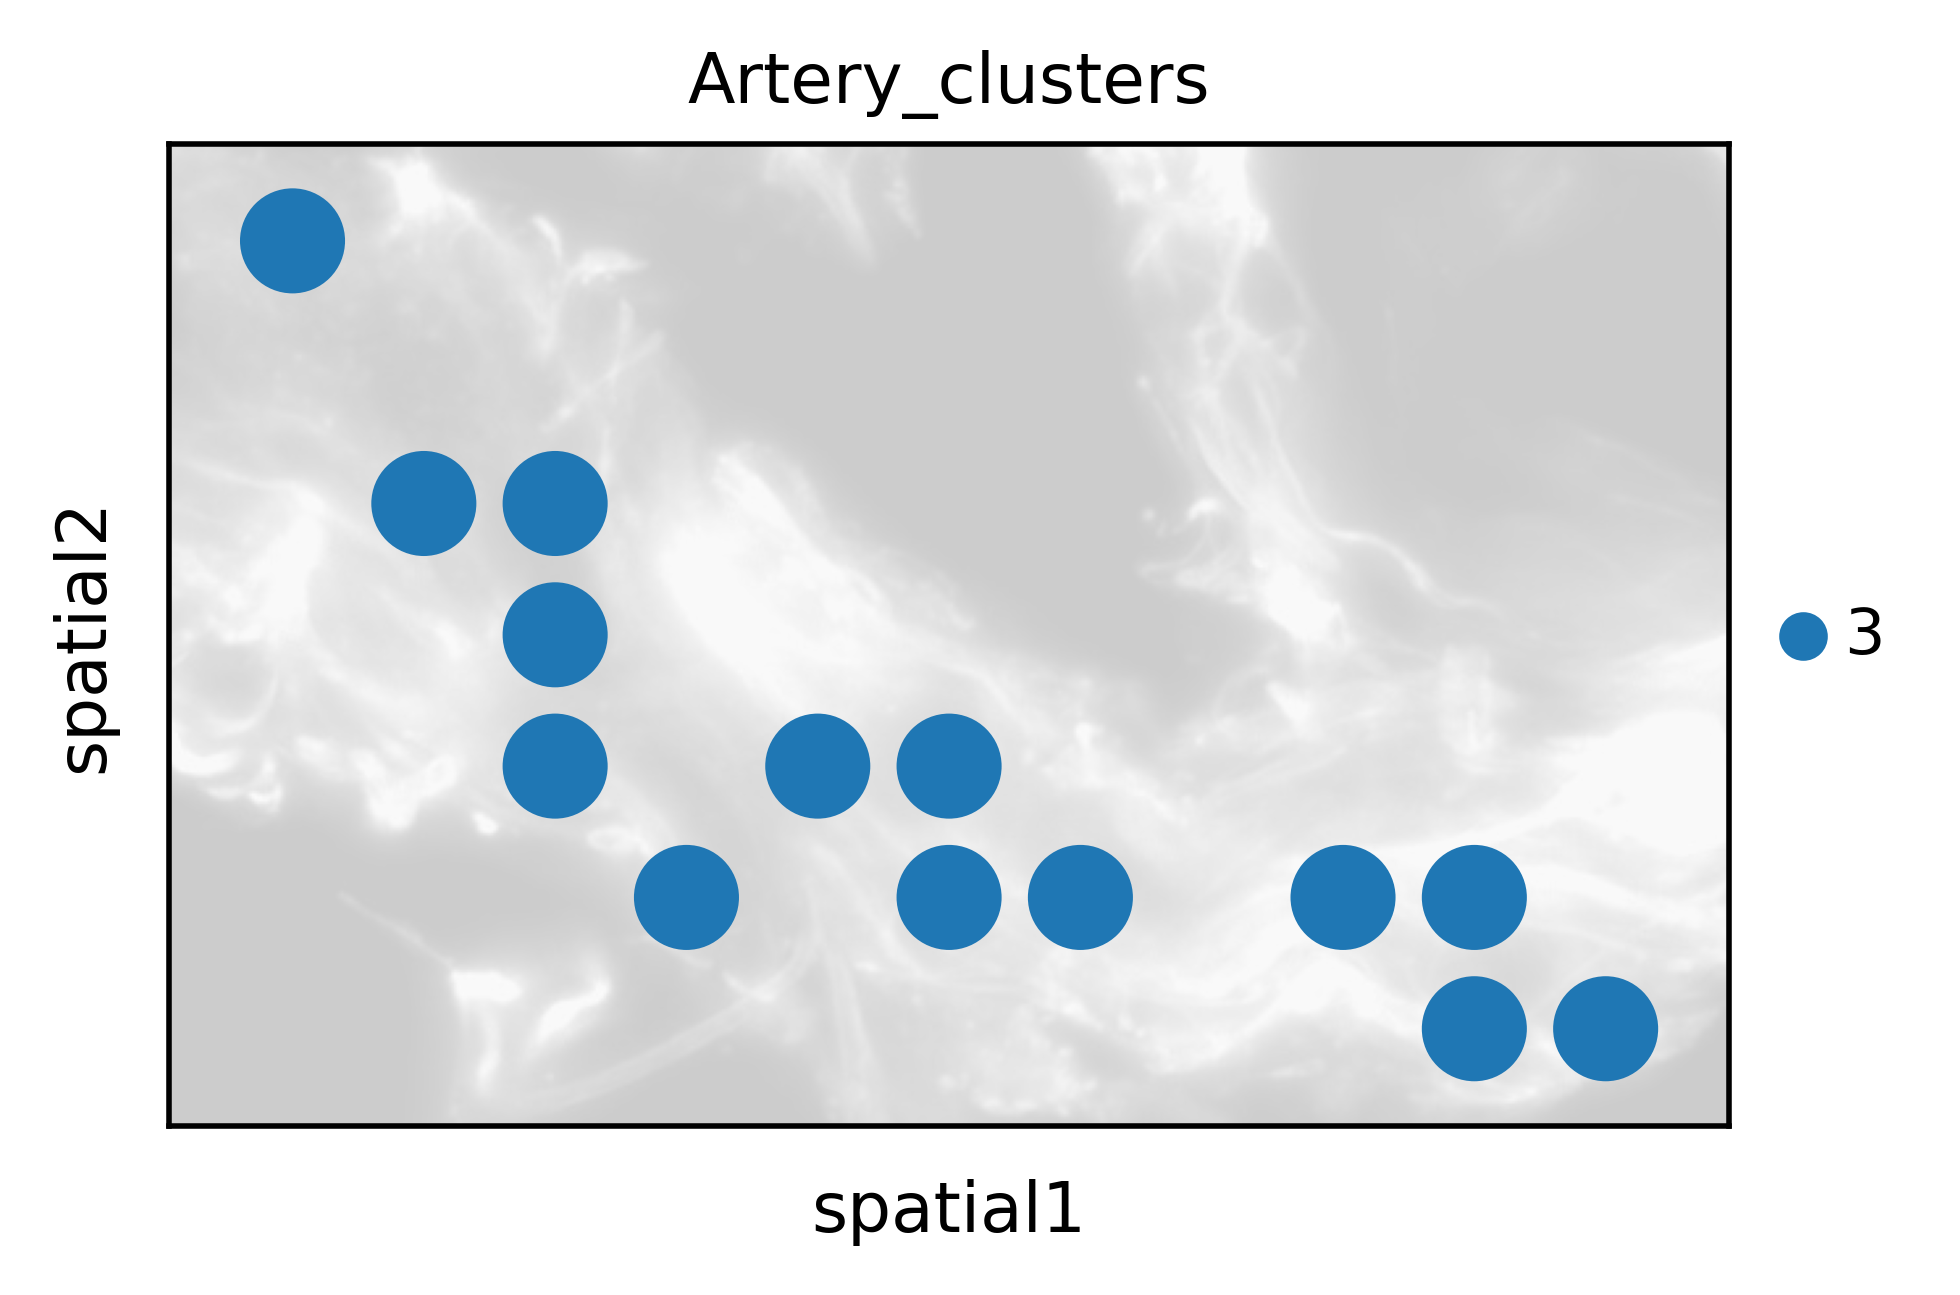

In [88]:
sc.pl.spatial(adata_aec_subset,color="Artery_clusters",img_key='WGA',size=8, alpha_img = 0.2)

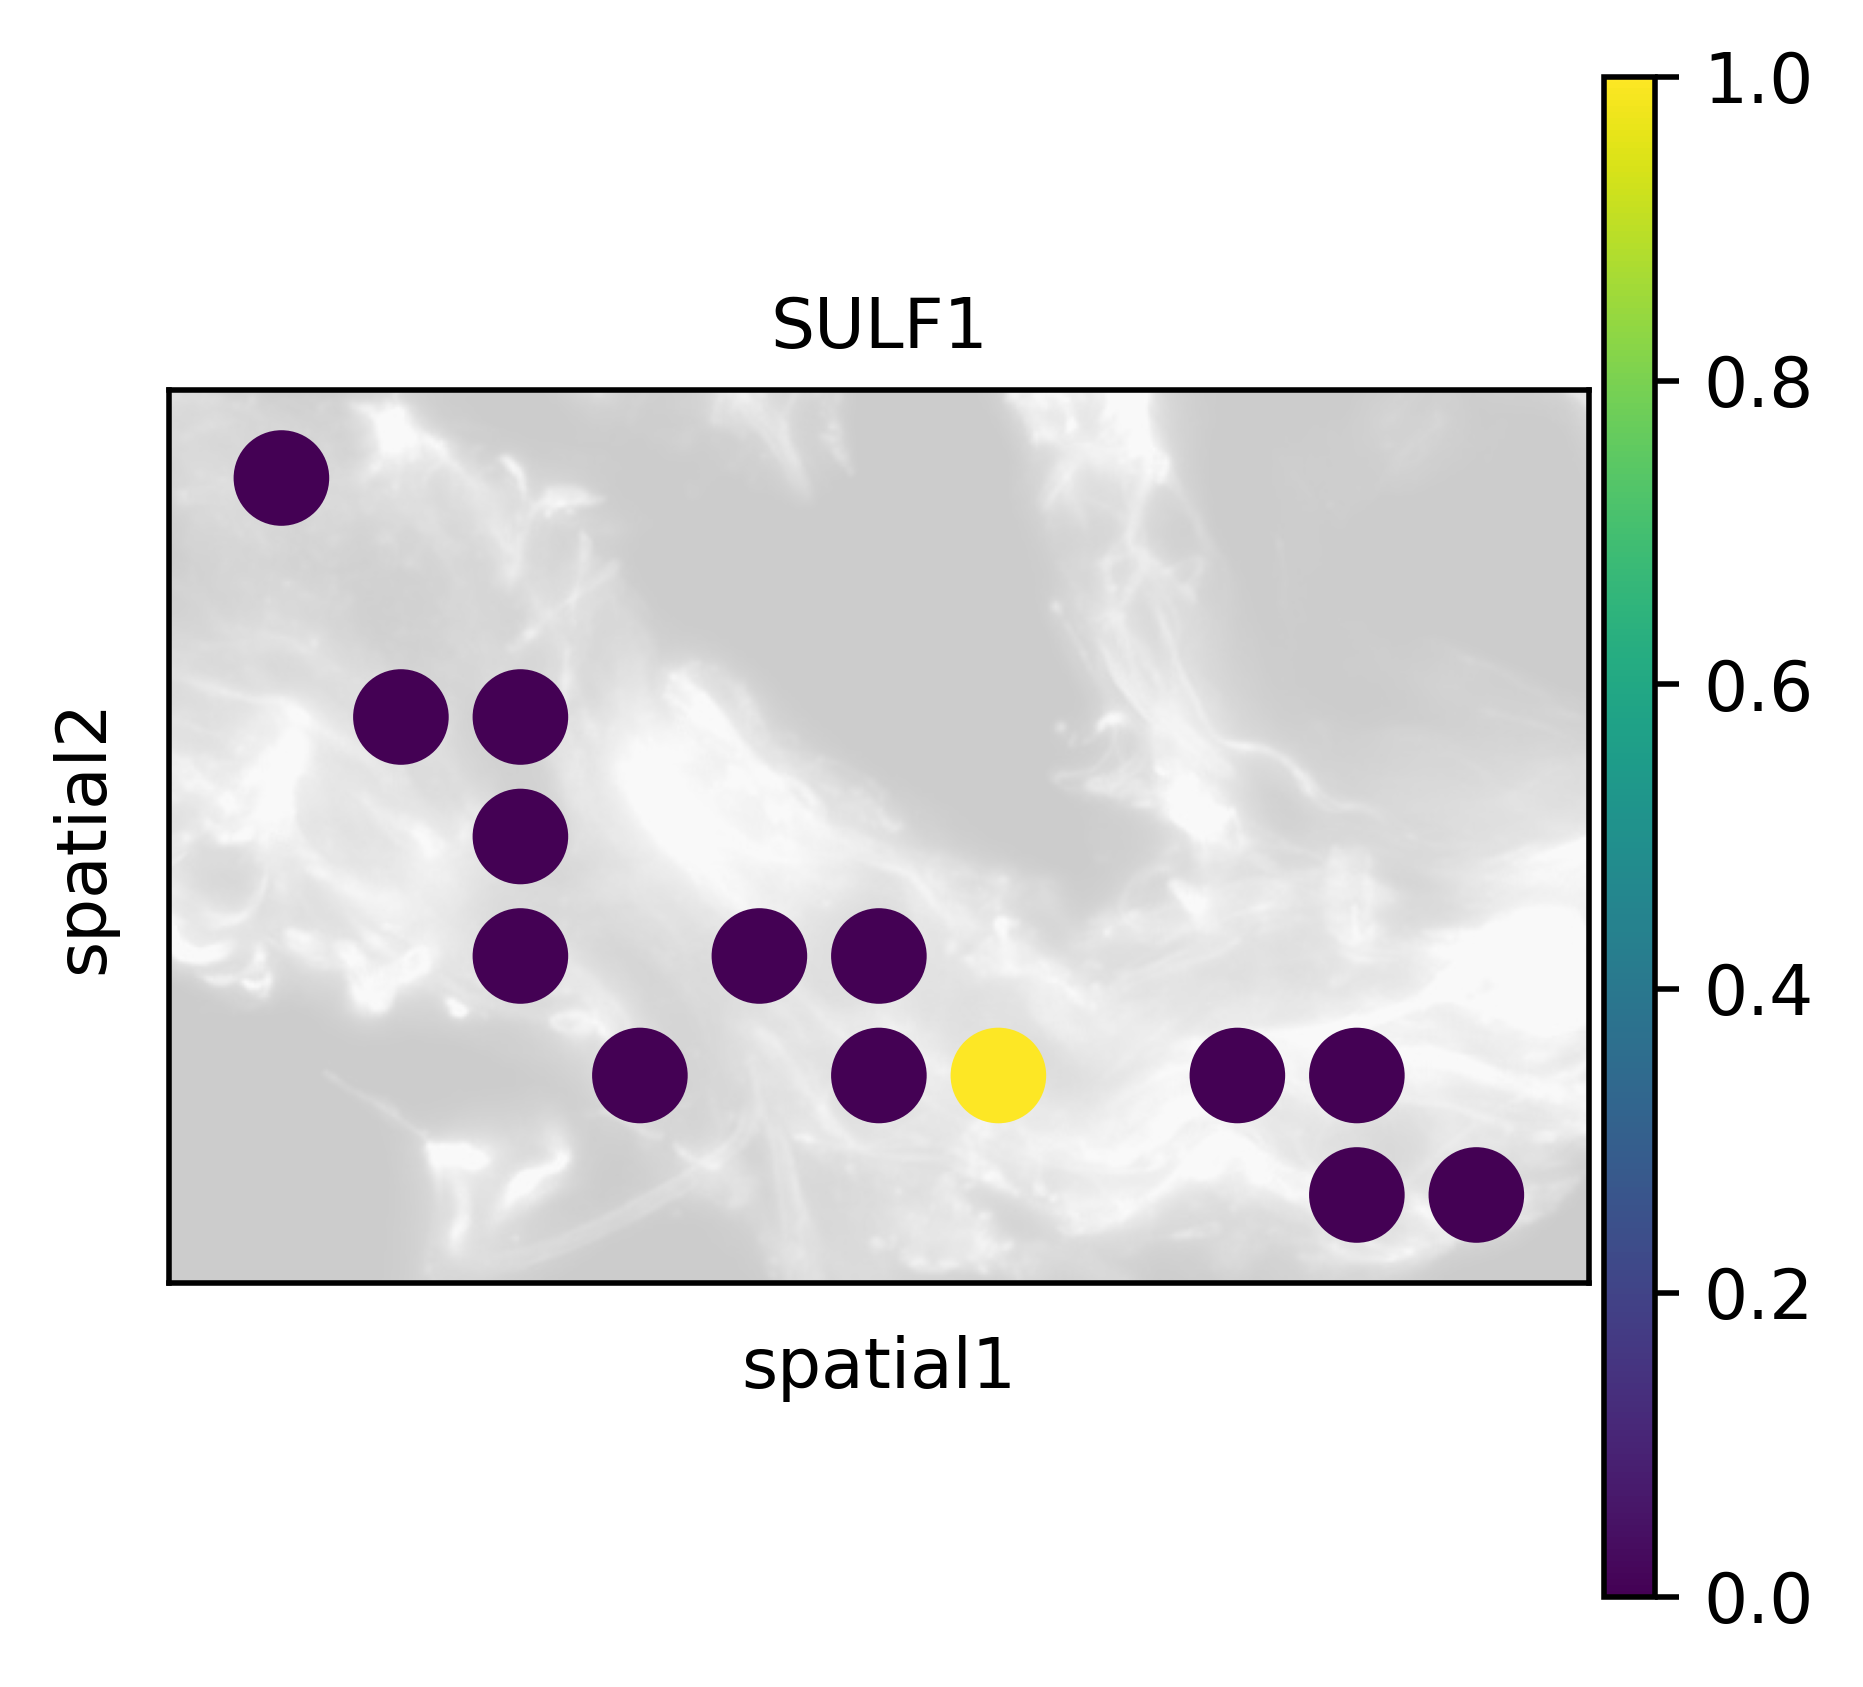

In [89]:
sc.pl.spatial(adata_aec_subset,color="SULF1",img_key='WGA',size=8, alpha_img = 0.2, vmax = 1)

In [90]:
group=pd.Series("Large", index=results2.index)

In [91]:
group[results2["size"] <= 30] = "Small"

In [92]:
group

ROI_D2-2_3    Small
dtype: object

In [93]:
results2["group"] = group

In [94]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  SULF1  NEBL  \
ROI_D2-2_3                 0.0            0.0           0.0    1.0   1.0   

            SEMA3G  RGCC  size   ROI  group  
ROI_D2-2_3     1.0   1.6    14  D2-2  Small

In [ ]:
#results4 = results2.drop(["ROI_D2-1_x"])
#results4

In [103]:
results2.to_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Arterial_quantification/D2-2.csv")

[Text(0.5, 1.0, 'SULF1 mean expression')]

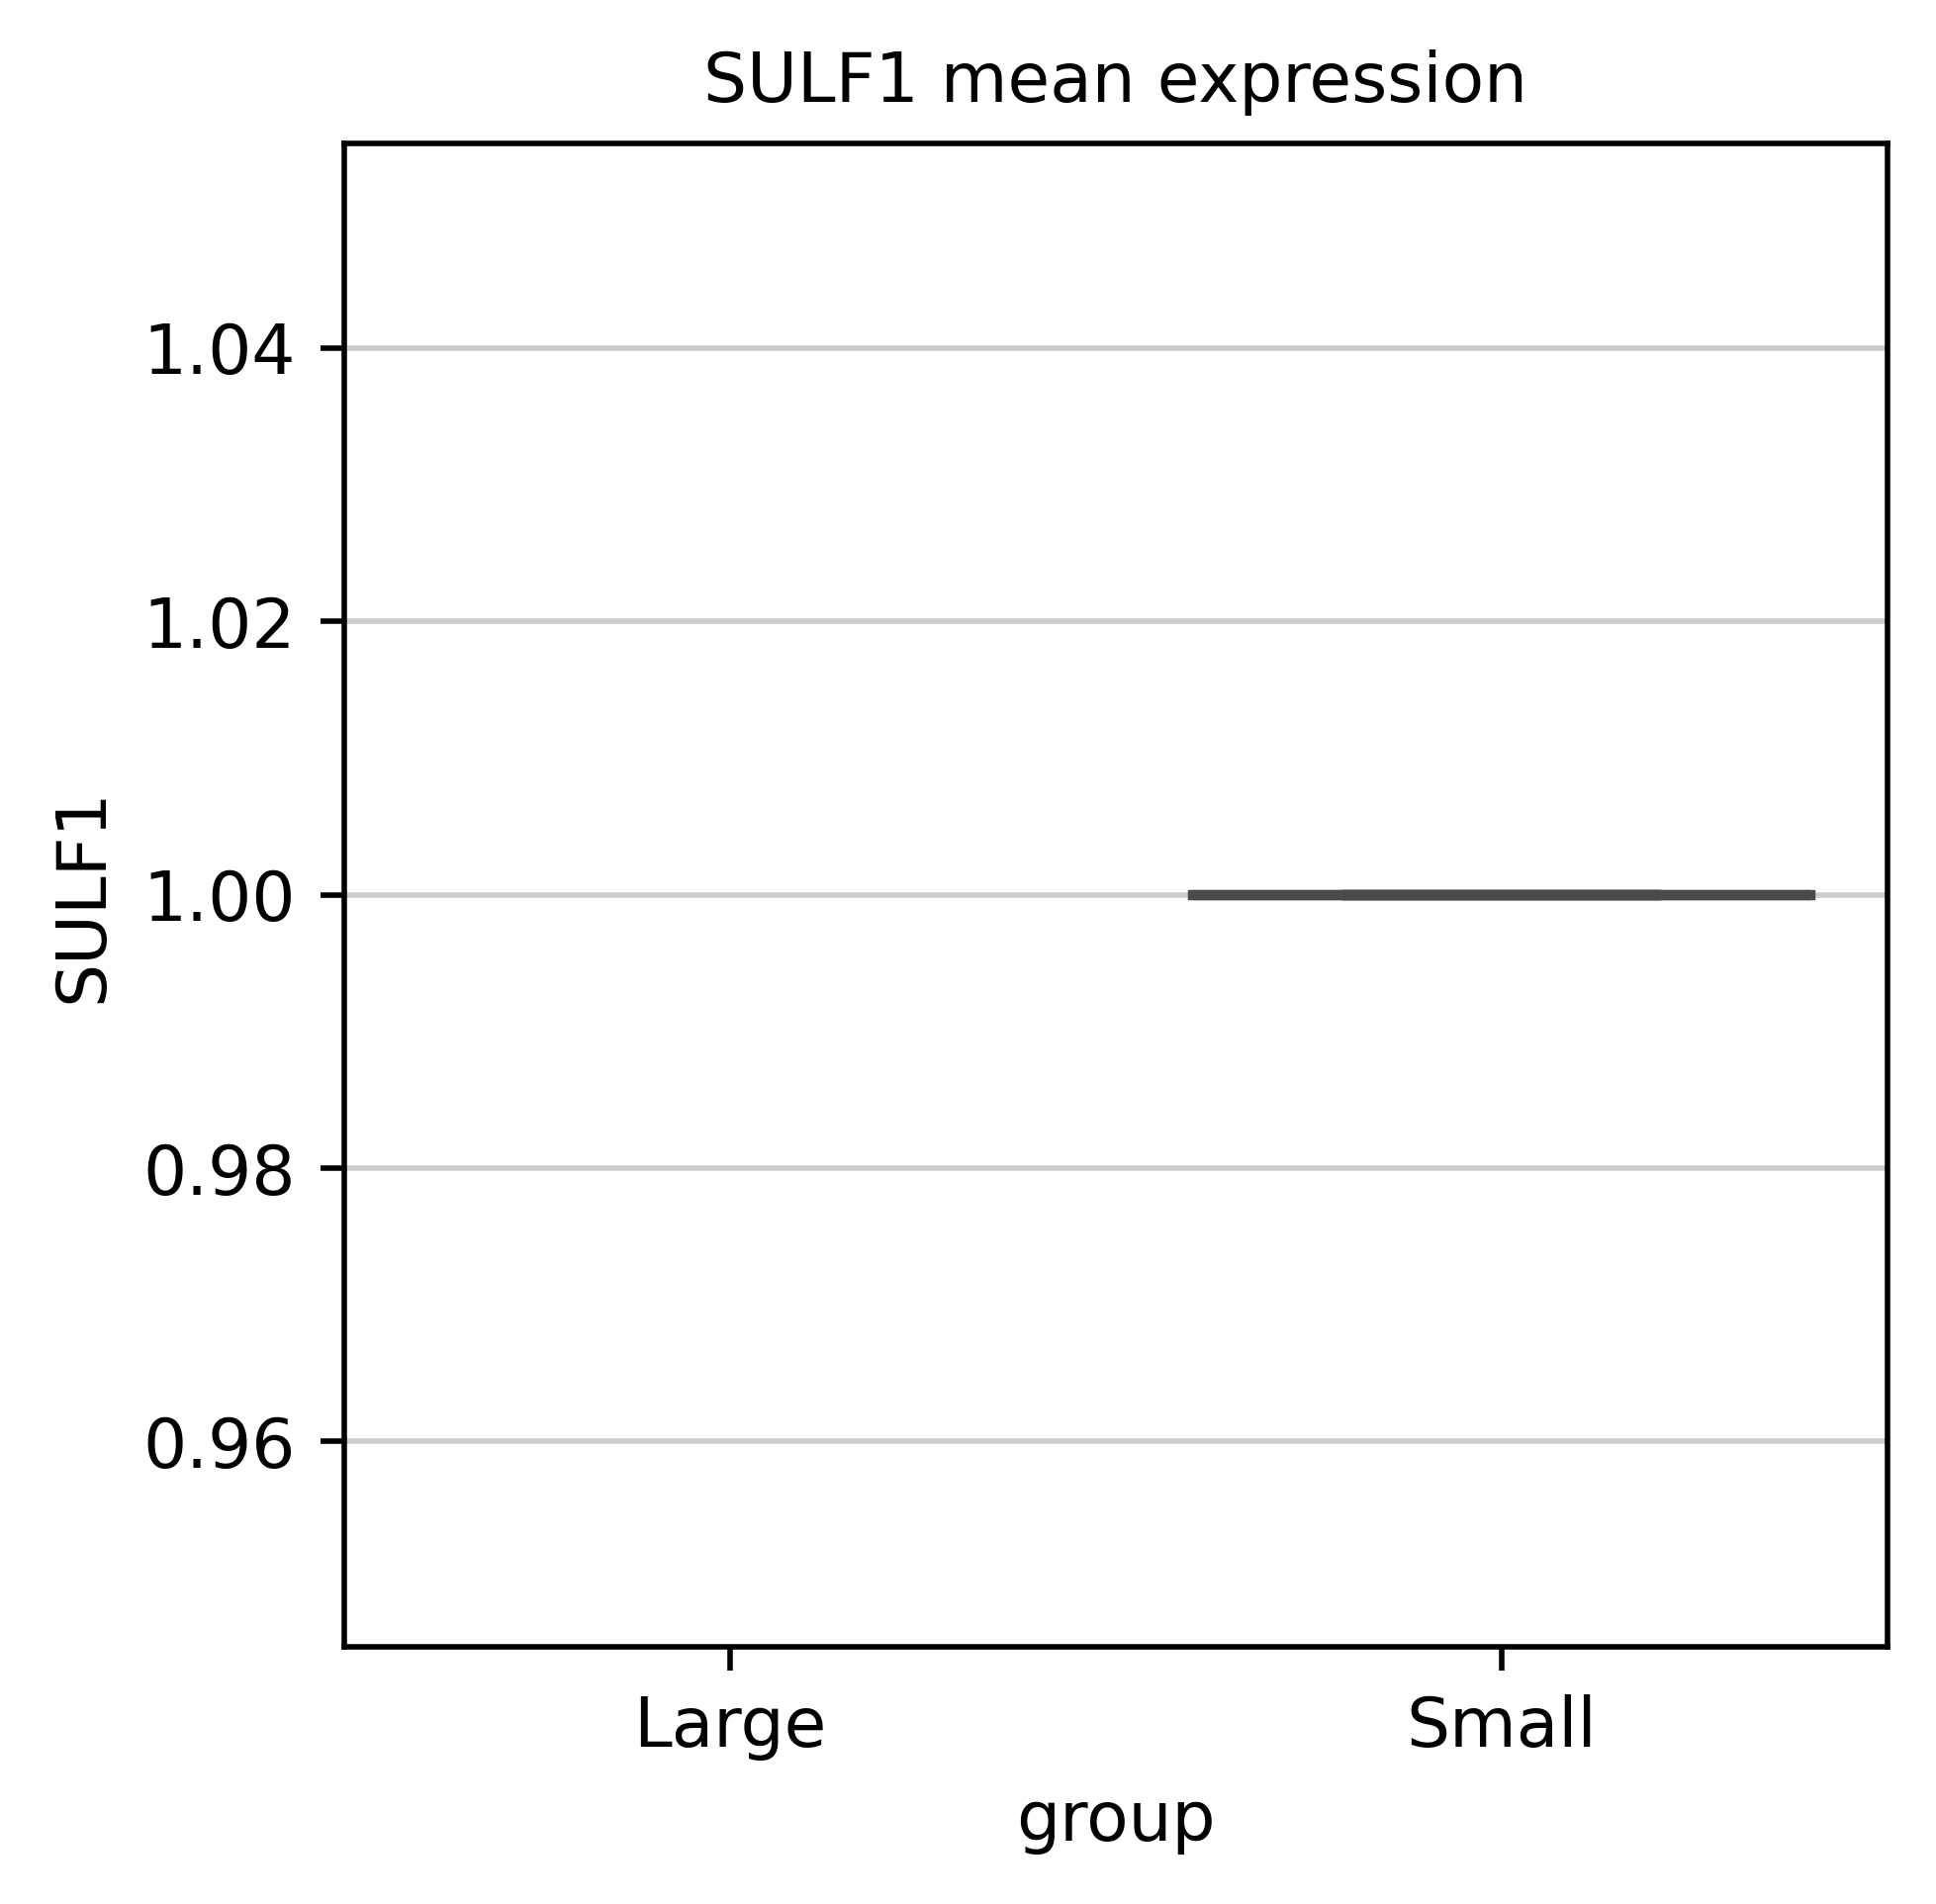

In [96]:
sns.boxplot(data = results2, x = "group", y = "SULF1", palette = 'Blues', order = ['Large','Small']).set(title='SULF1 mean expression')

[Text(0.5, 1.0, 'SULF1 percent expressing')]

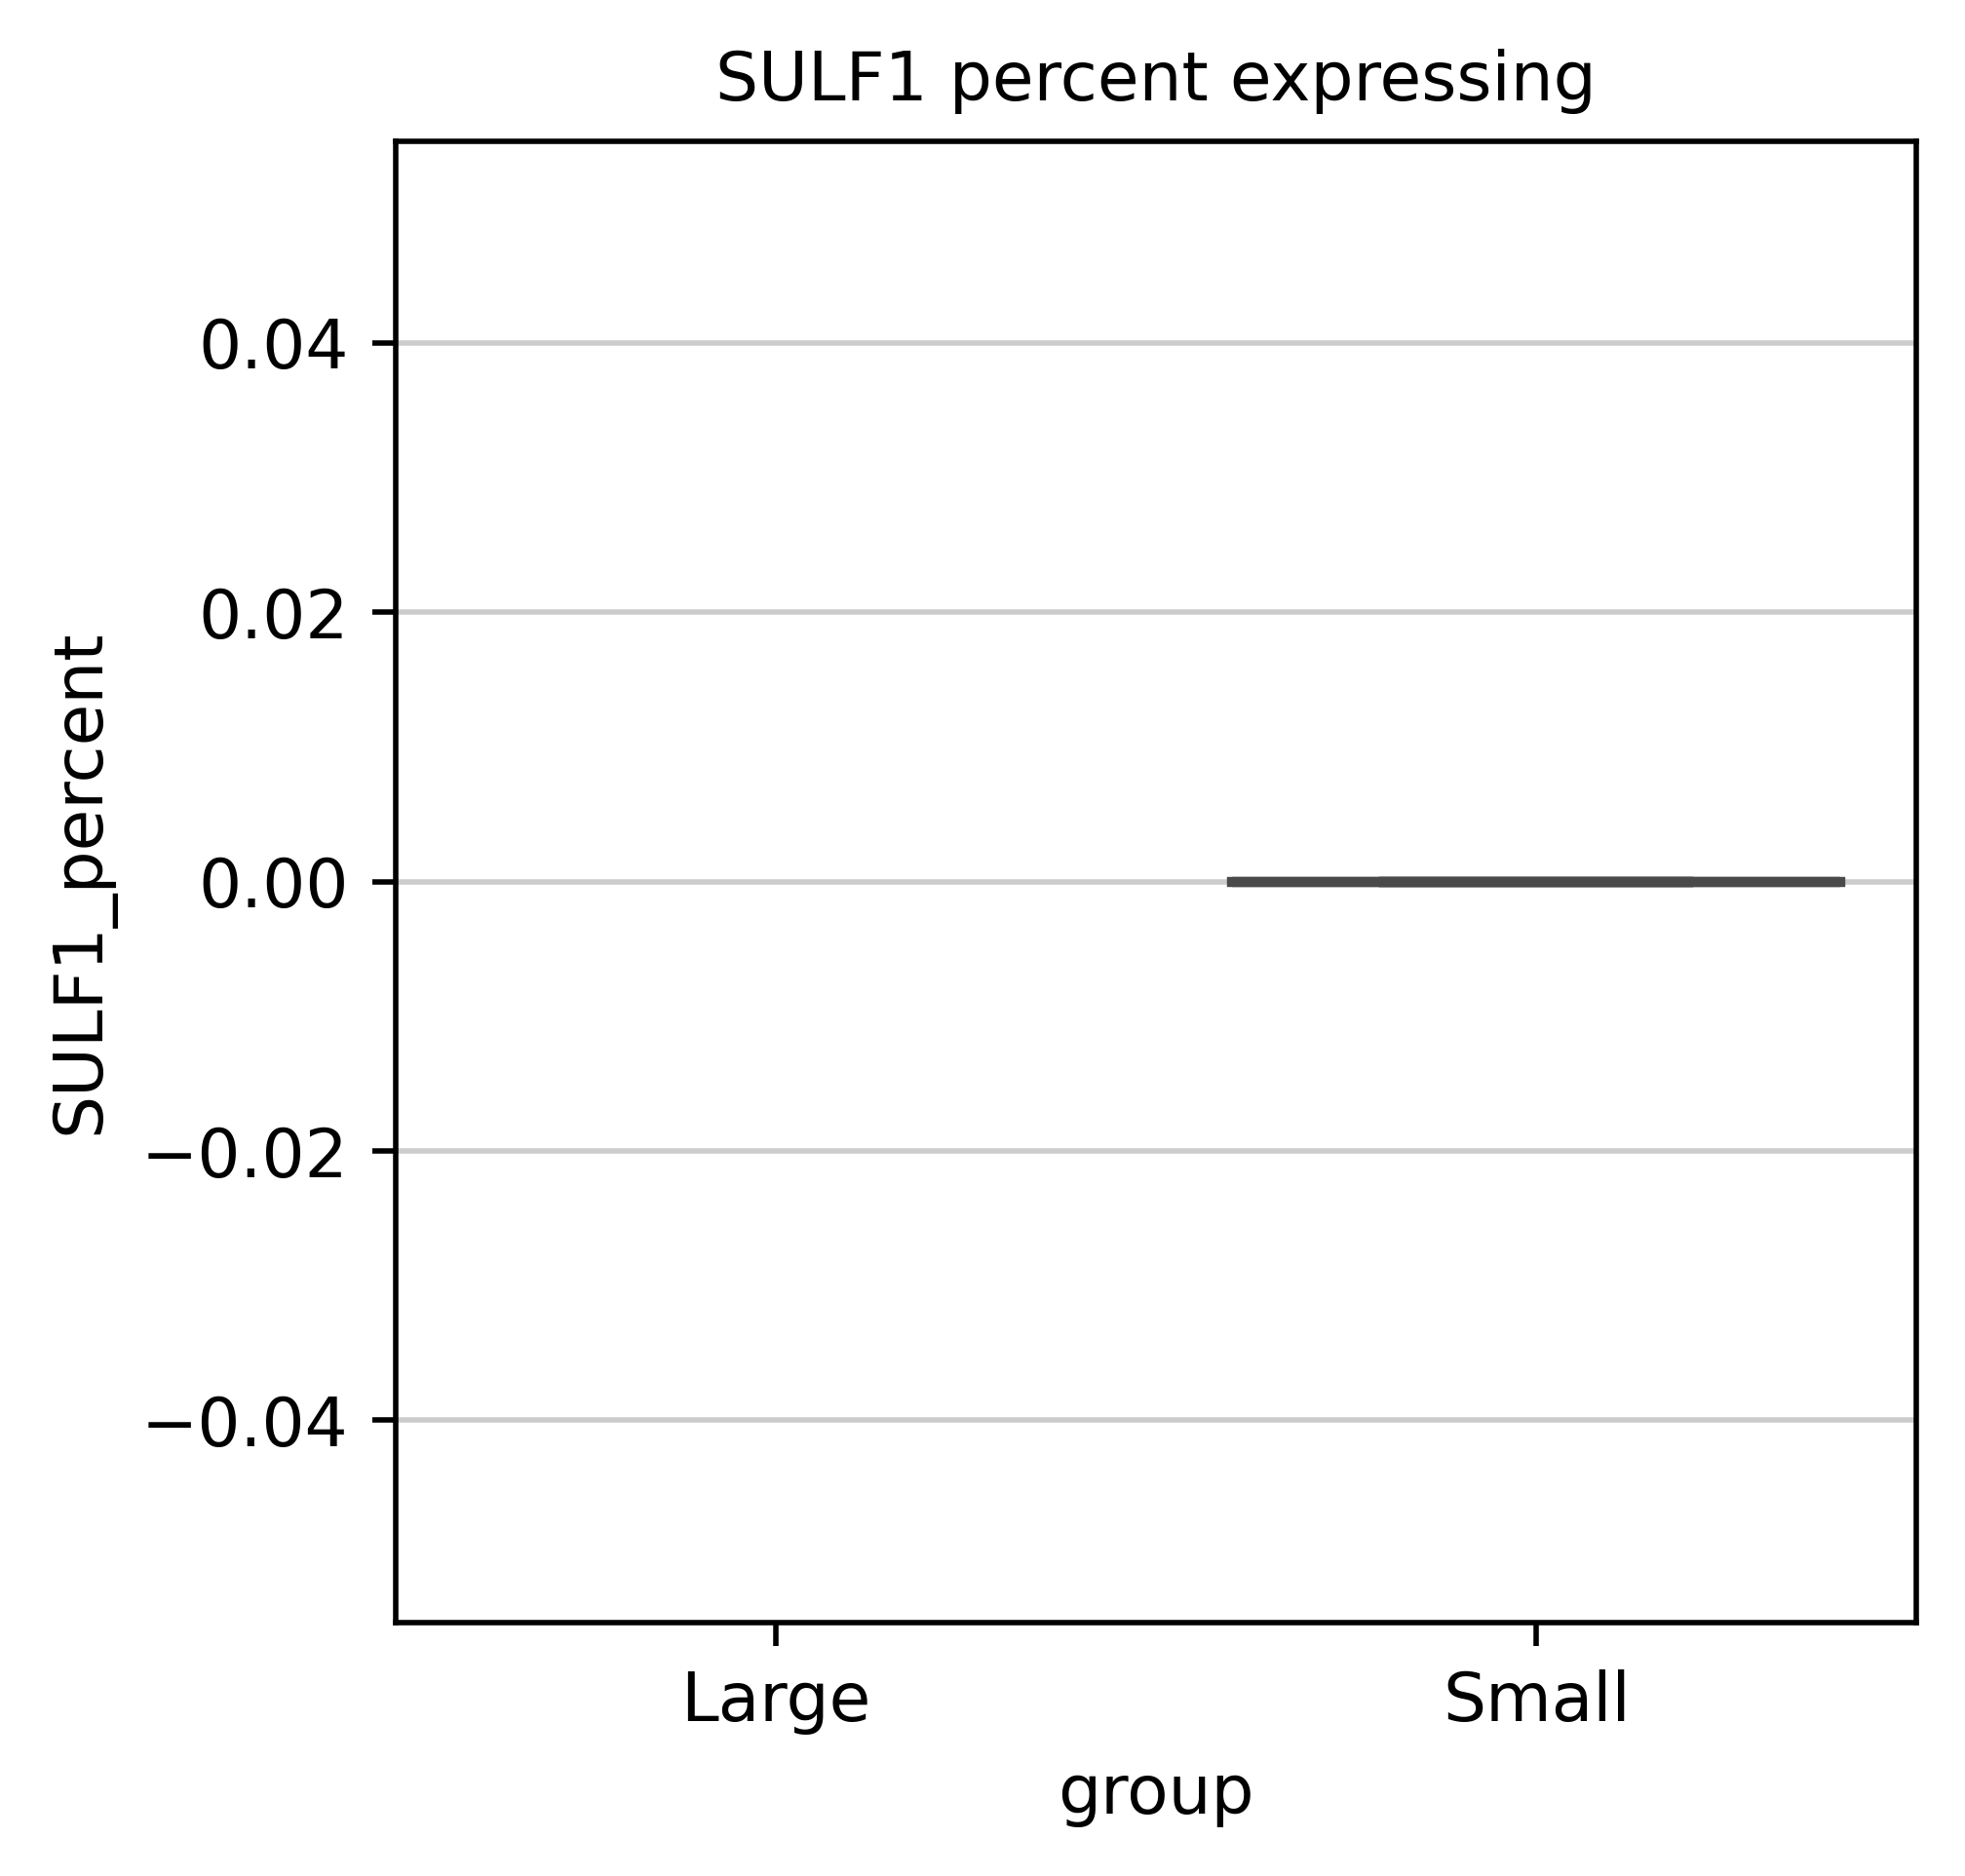

In [97]:
sns.boxplot(data = results2, x = "group", y = "SULF1_percent", palette = 'Blues', order = ['Large','Small']).set(title='SULF1 percent expressing')

[Text(0.5, 1.0, 'RGCC mean expression')]

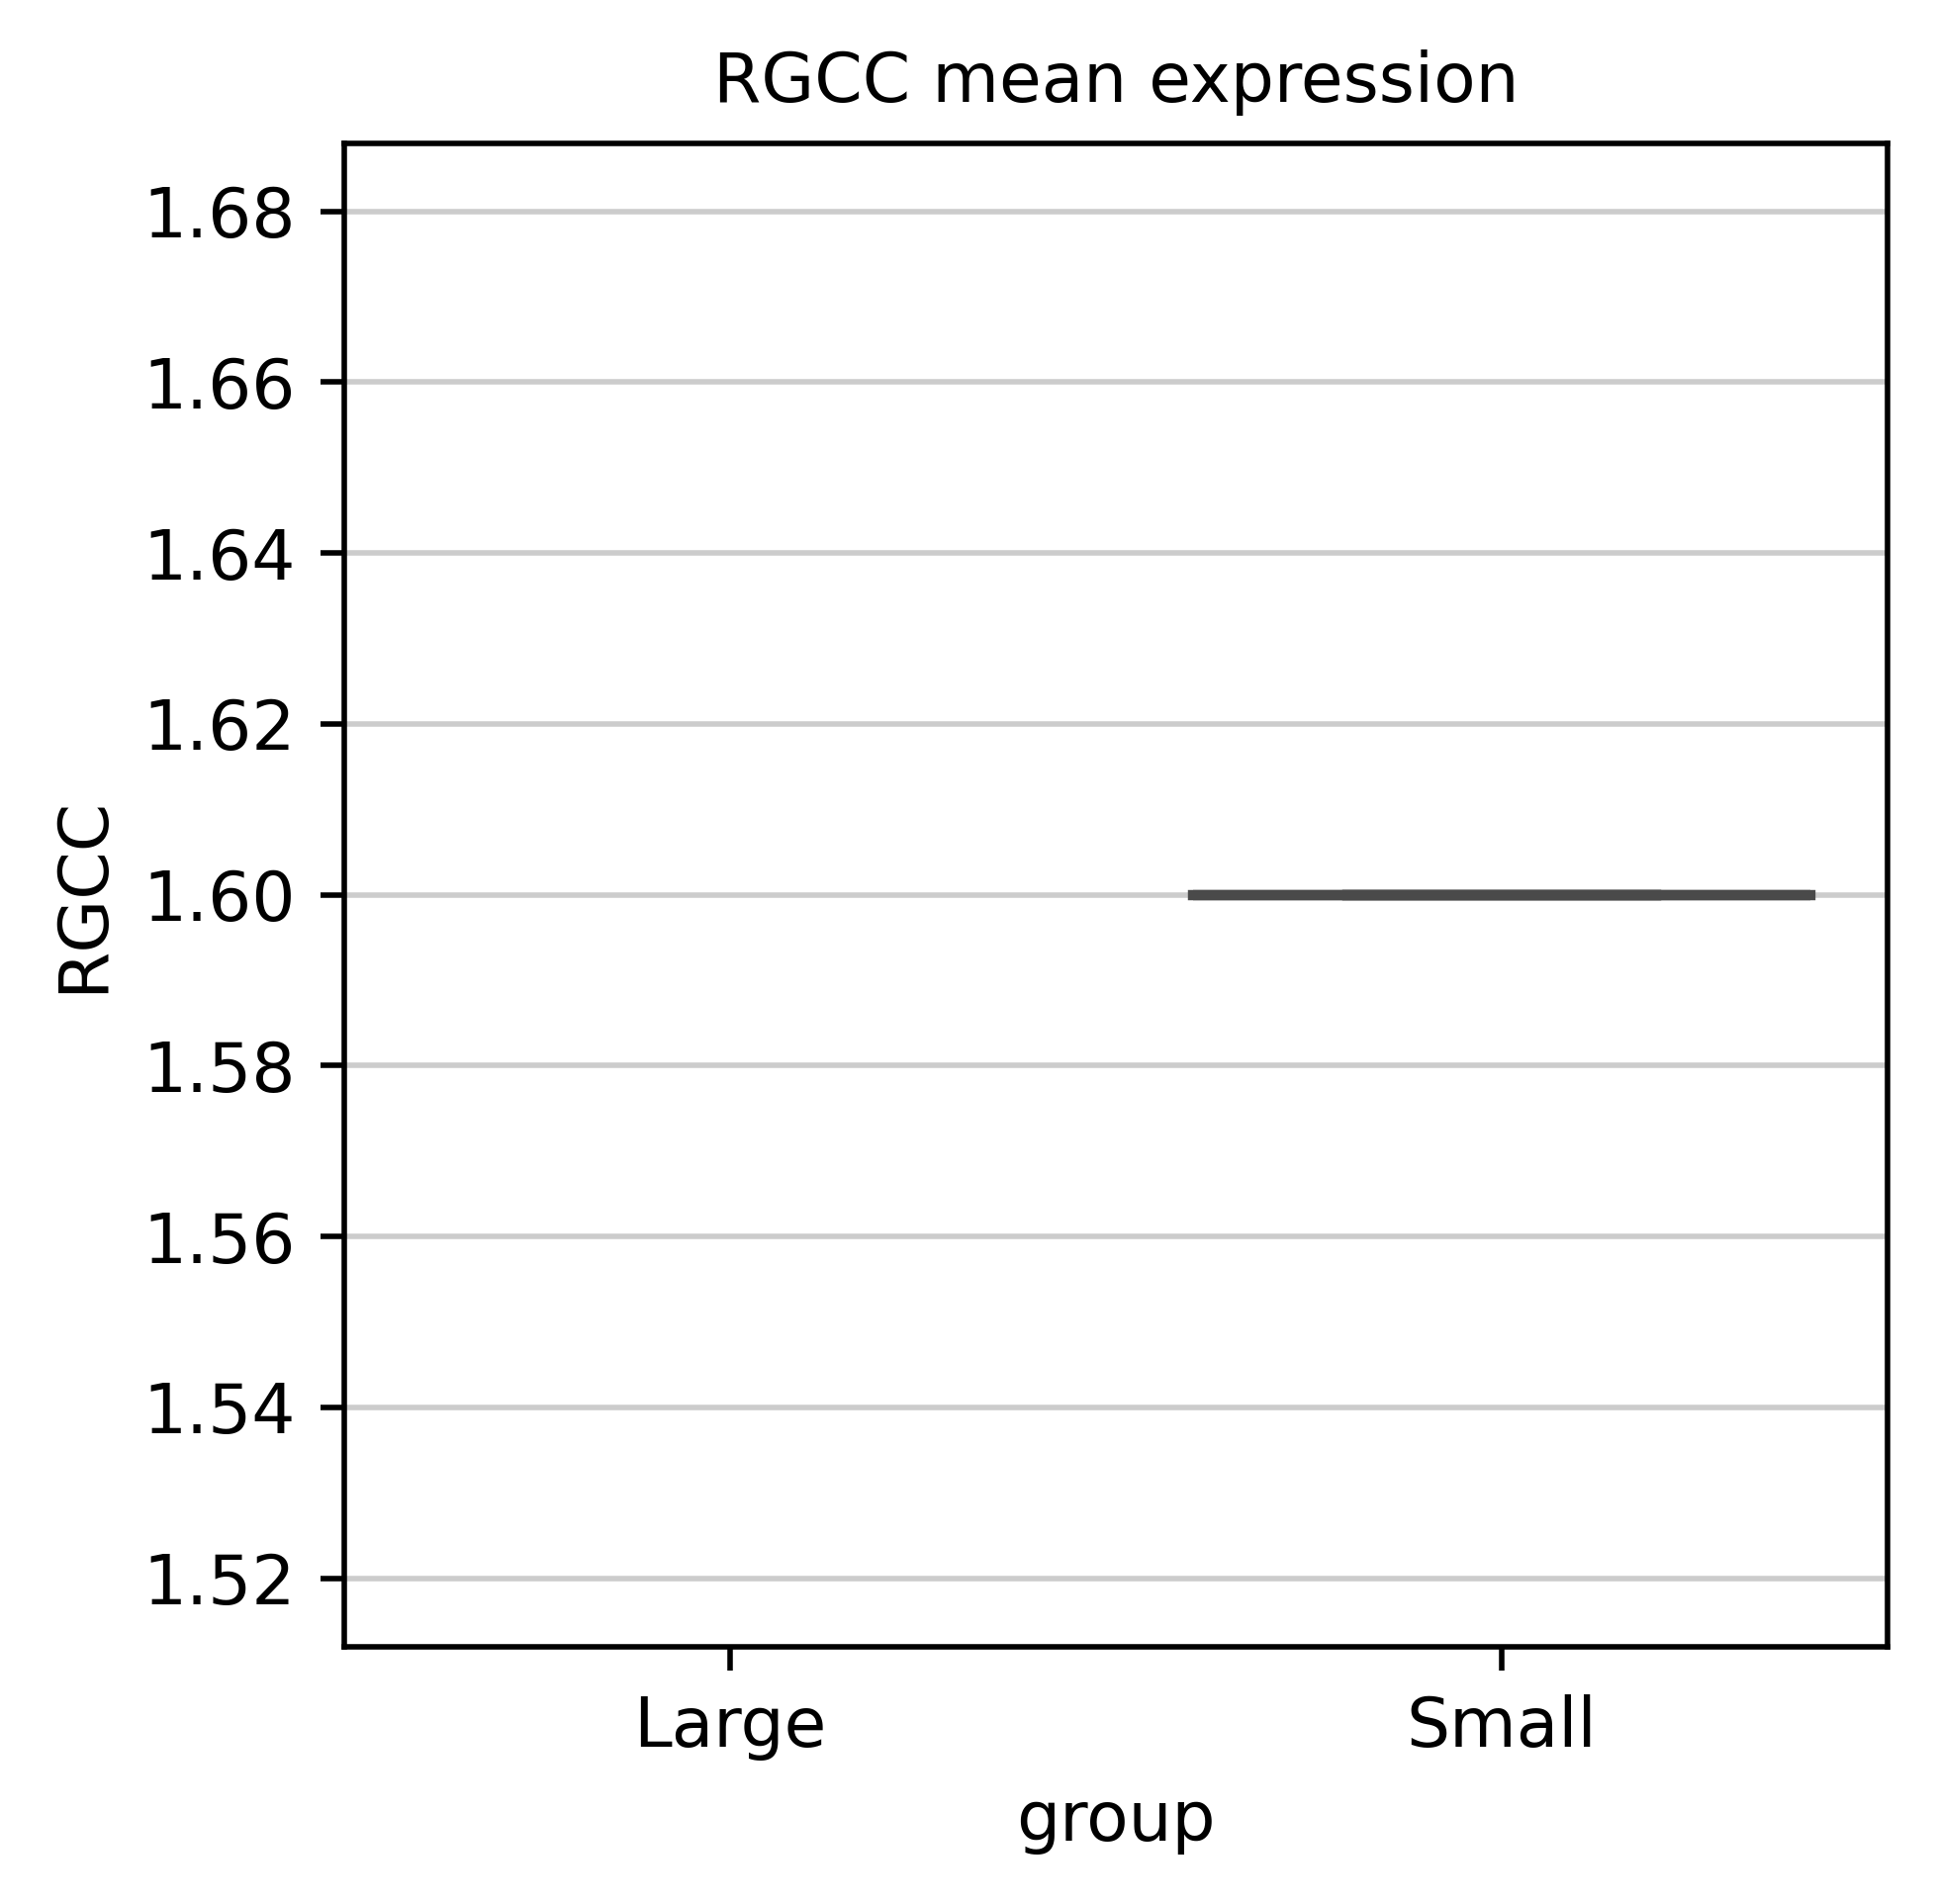

In [98]:
sns.boxplot(data = results2, x = "group", y = "RGCC", palette = 'Oranges', order = ['Large','Small']).set(title='RGCC mean expression')

[Text(0.5, 1.0, 'SEMA3G mean expression')]

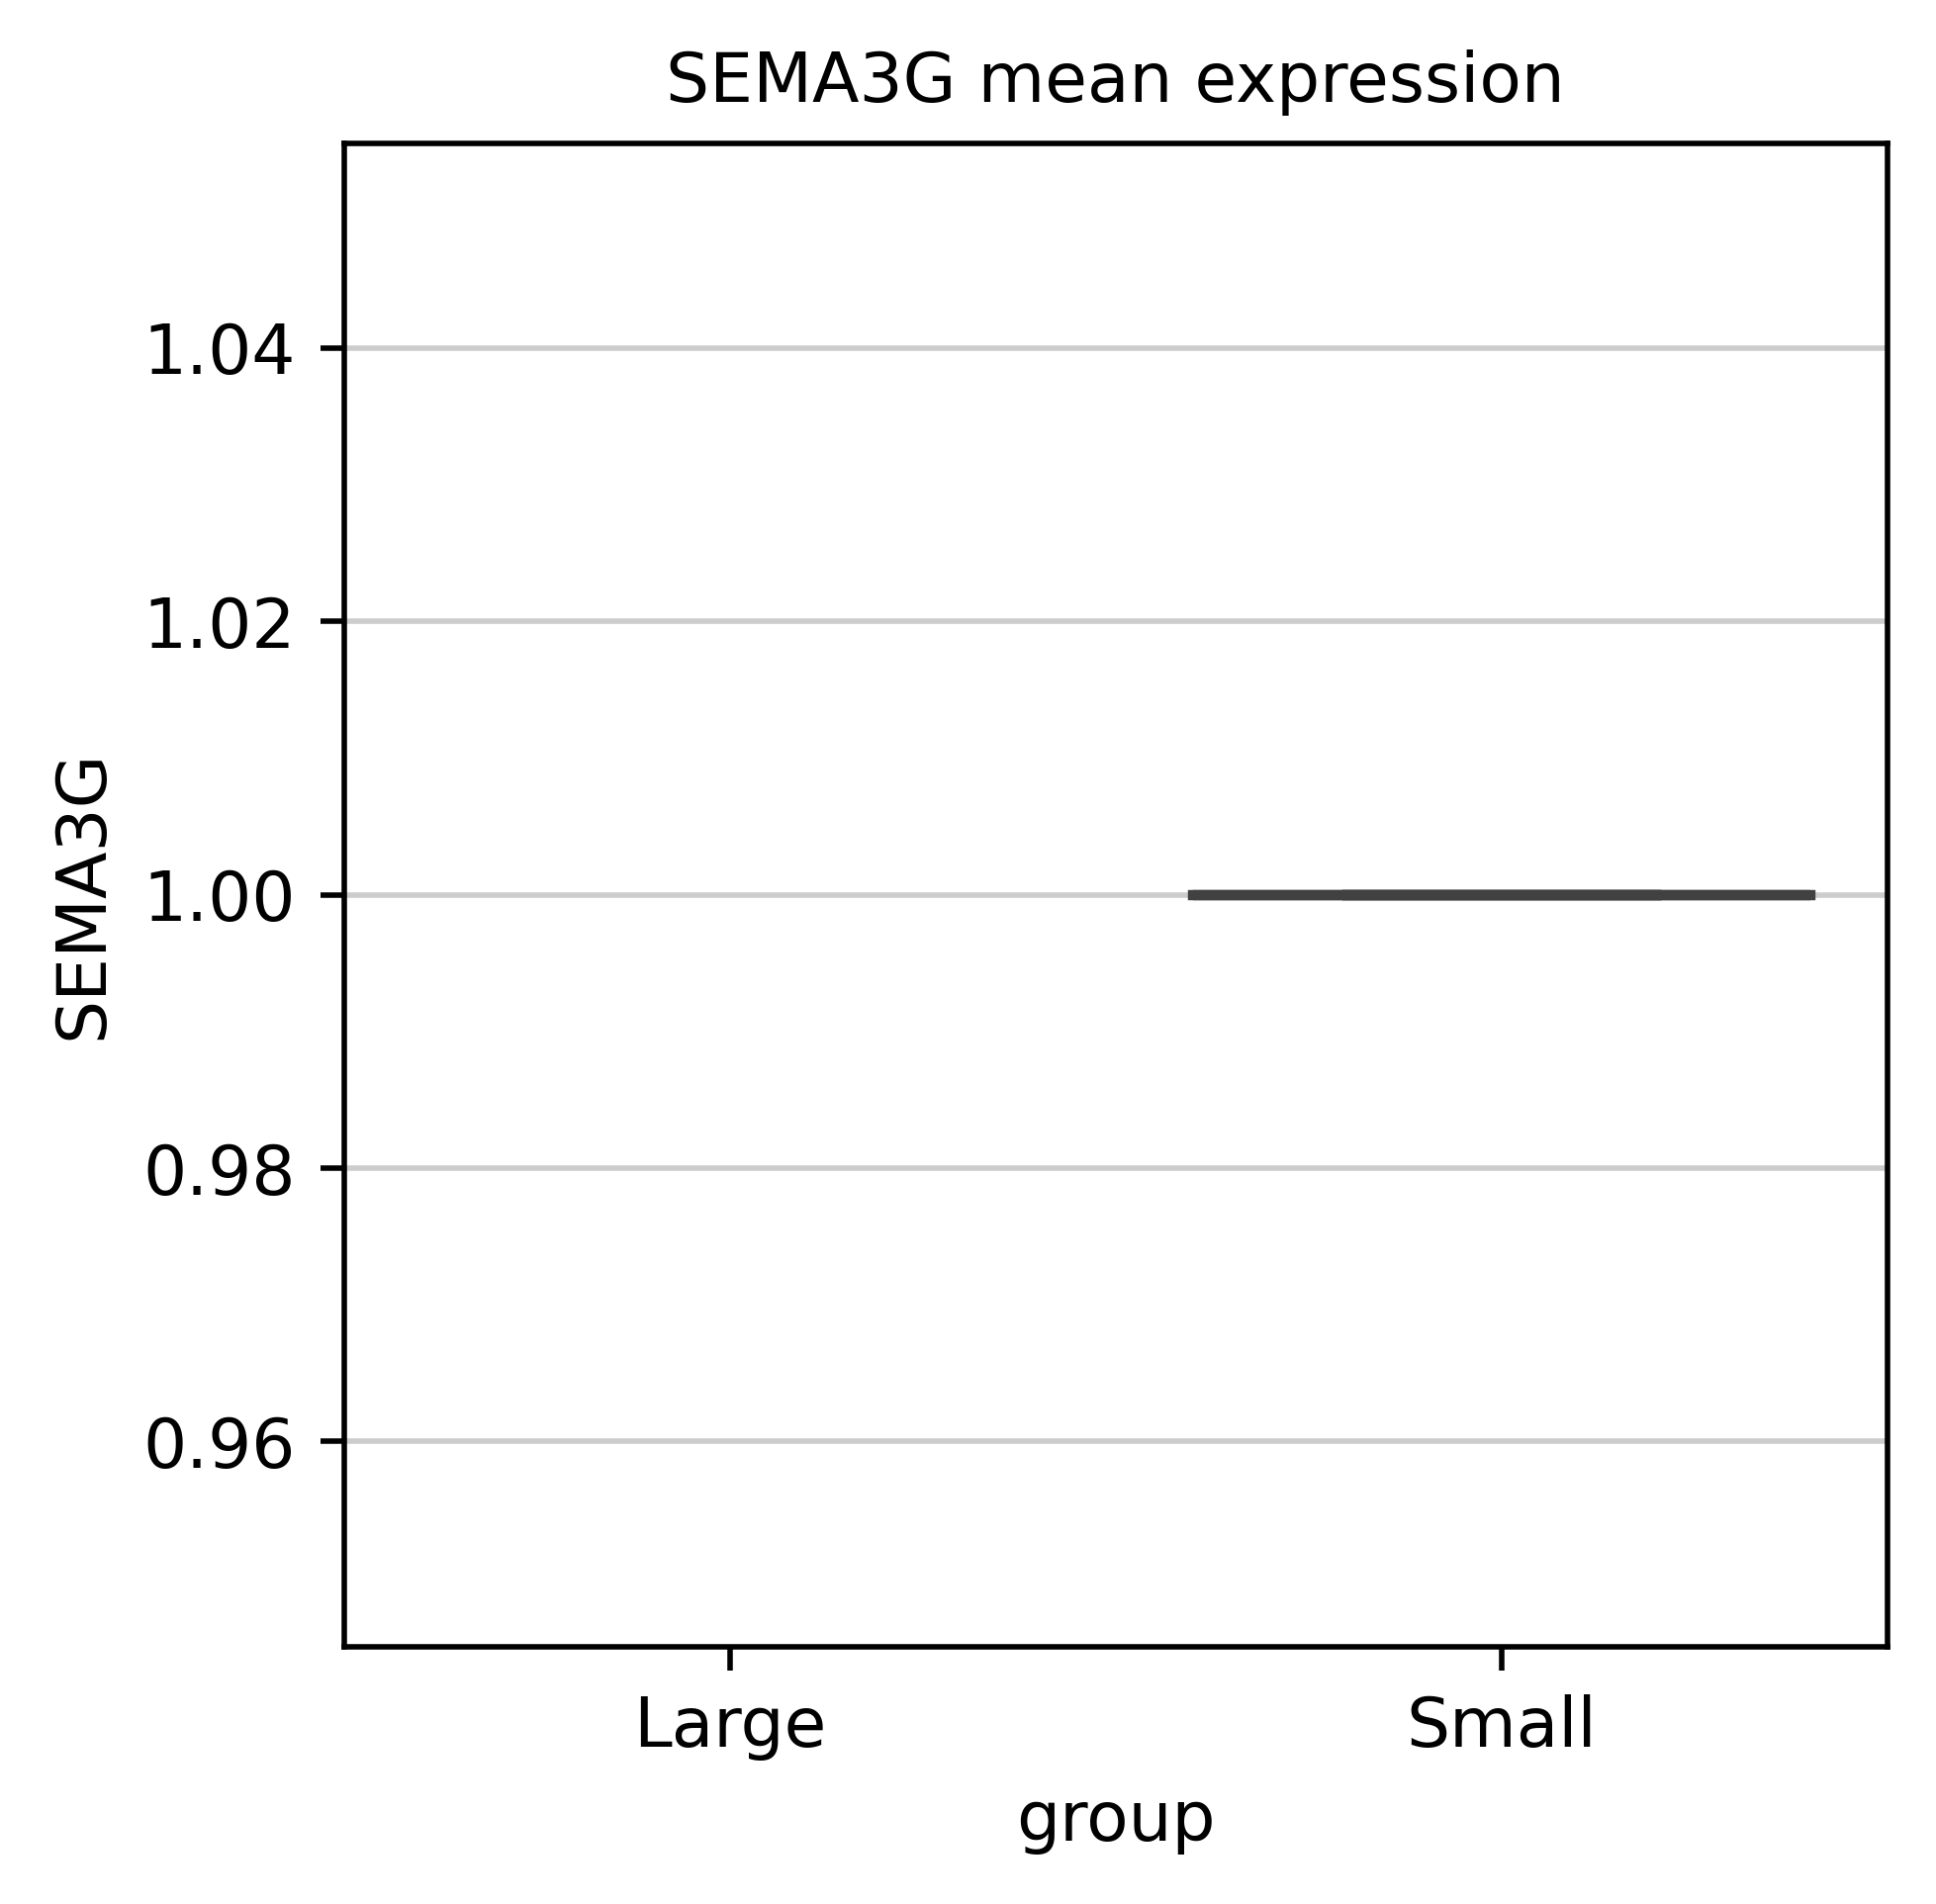

In [99]:
sns.boxplot(data = results2, x = "group", y = "SEMA3G", palette = 'Greens', order = ['Large','Small']).set(title='SEMA3G mean expression')

[Text(0.5, 1.0, 'NEBL mean expression')]

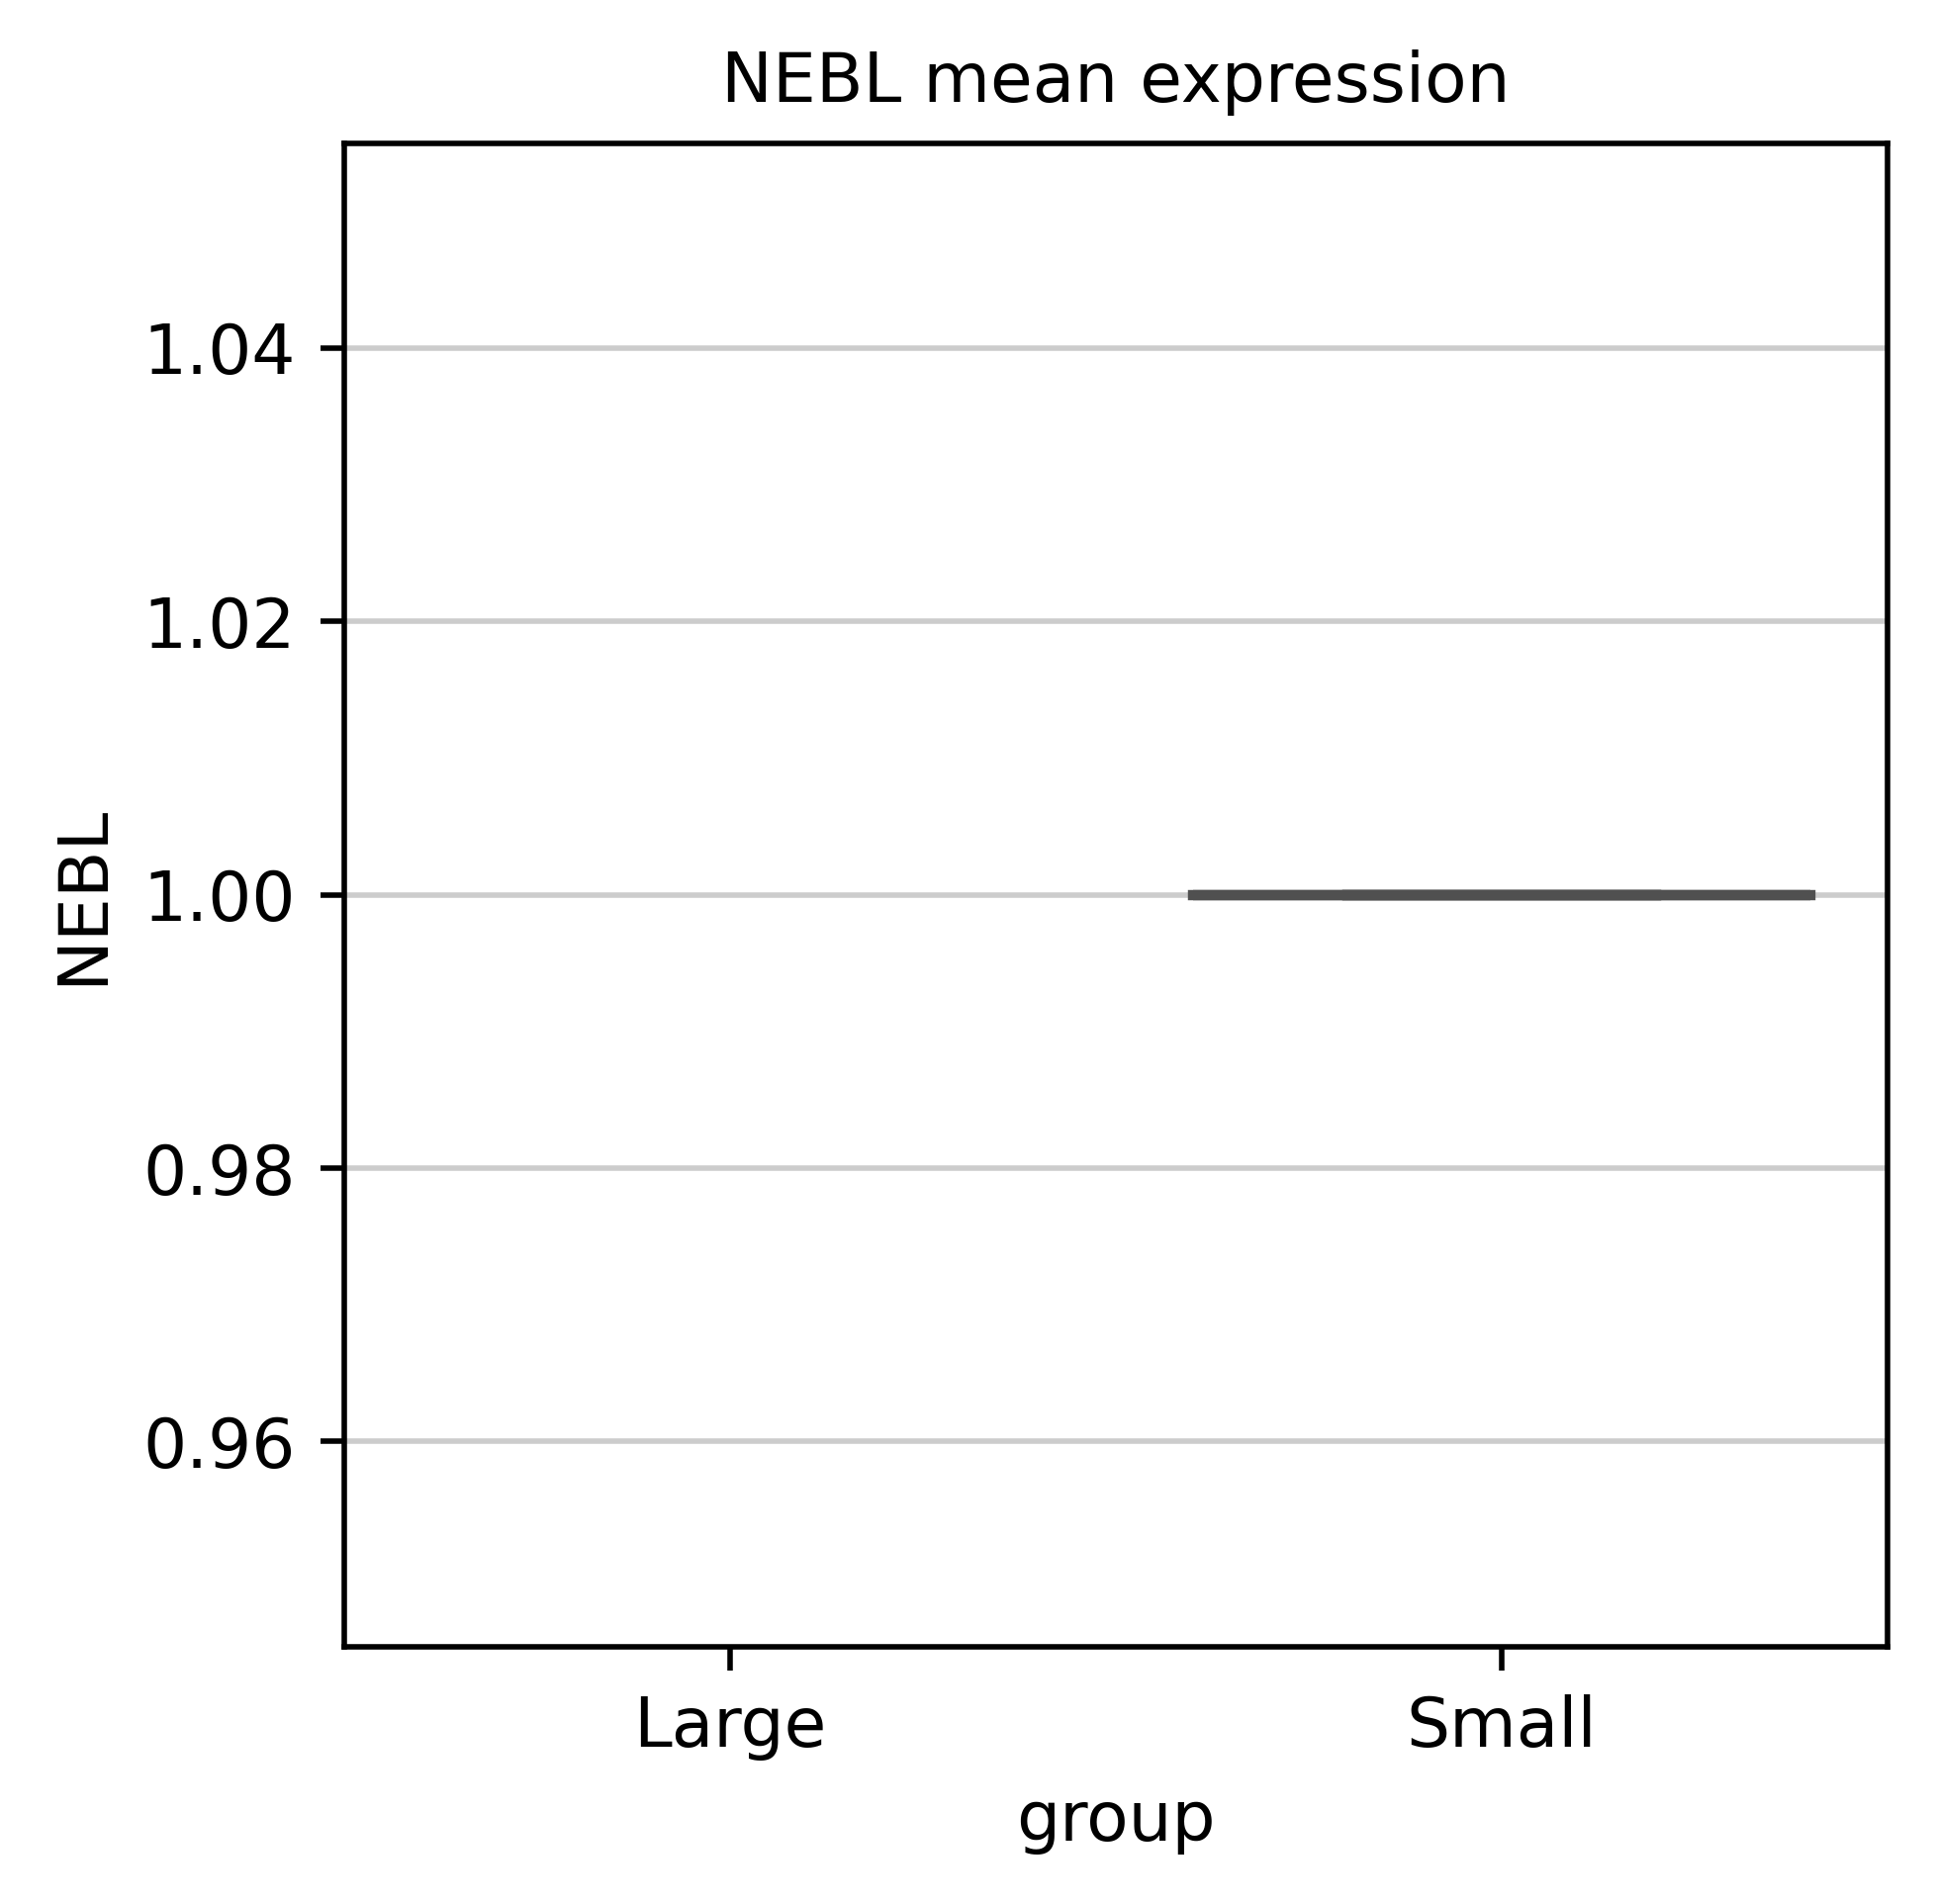

In [100]:
sns.boxplot(data = results2, x = "group", y = "NEBL", palette = 'Reds', order = ['Large','Small']).set(title='NEBL mean expression')

[Text(0.5, 1.0, 'NEBL percent expressing')]

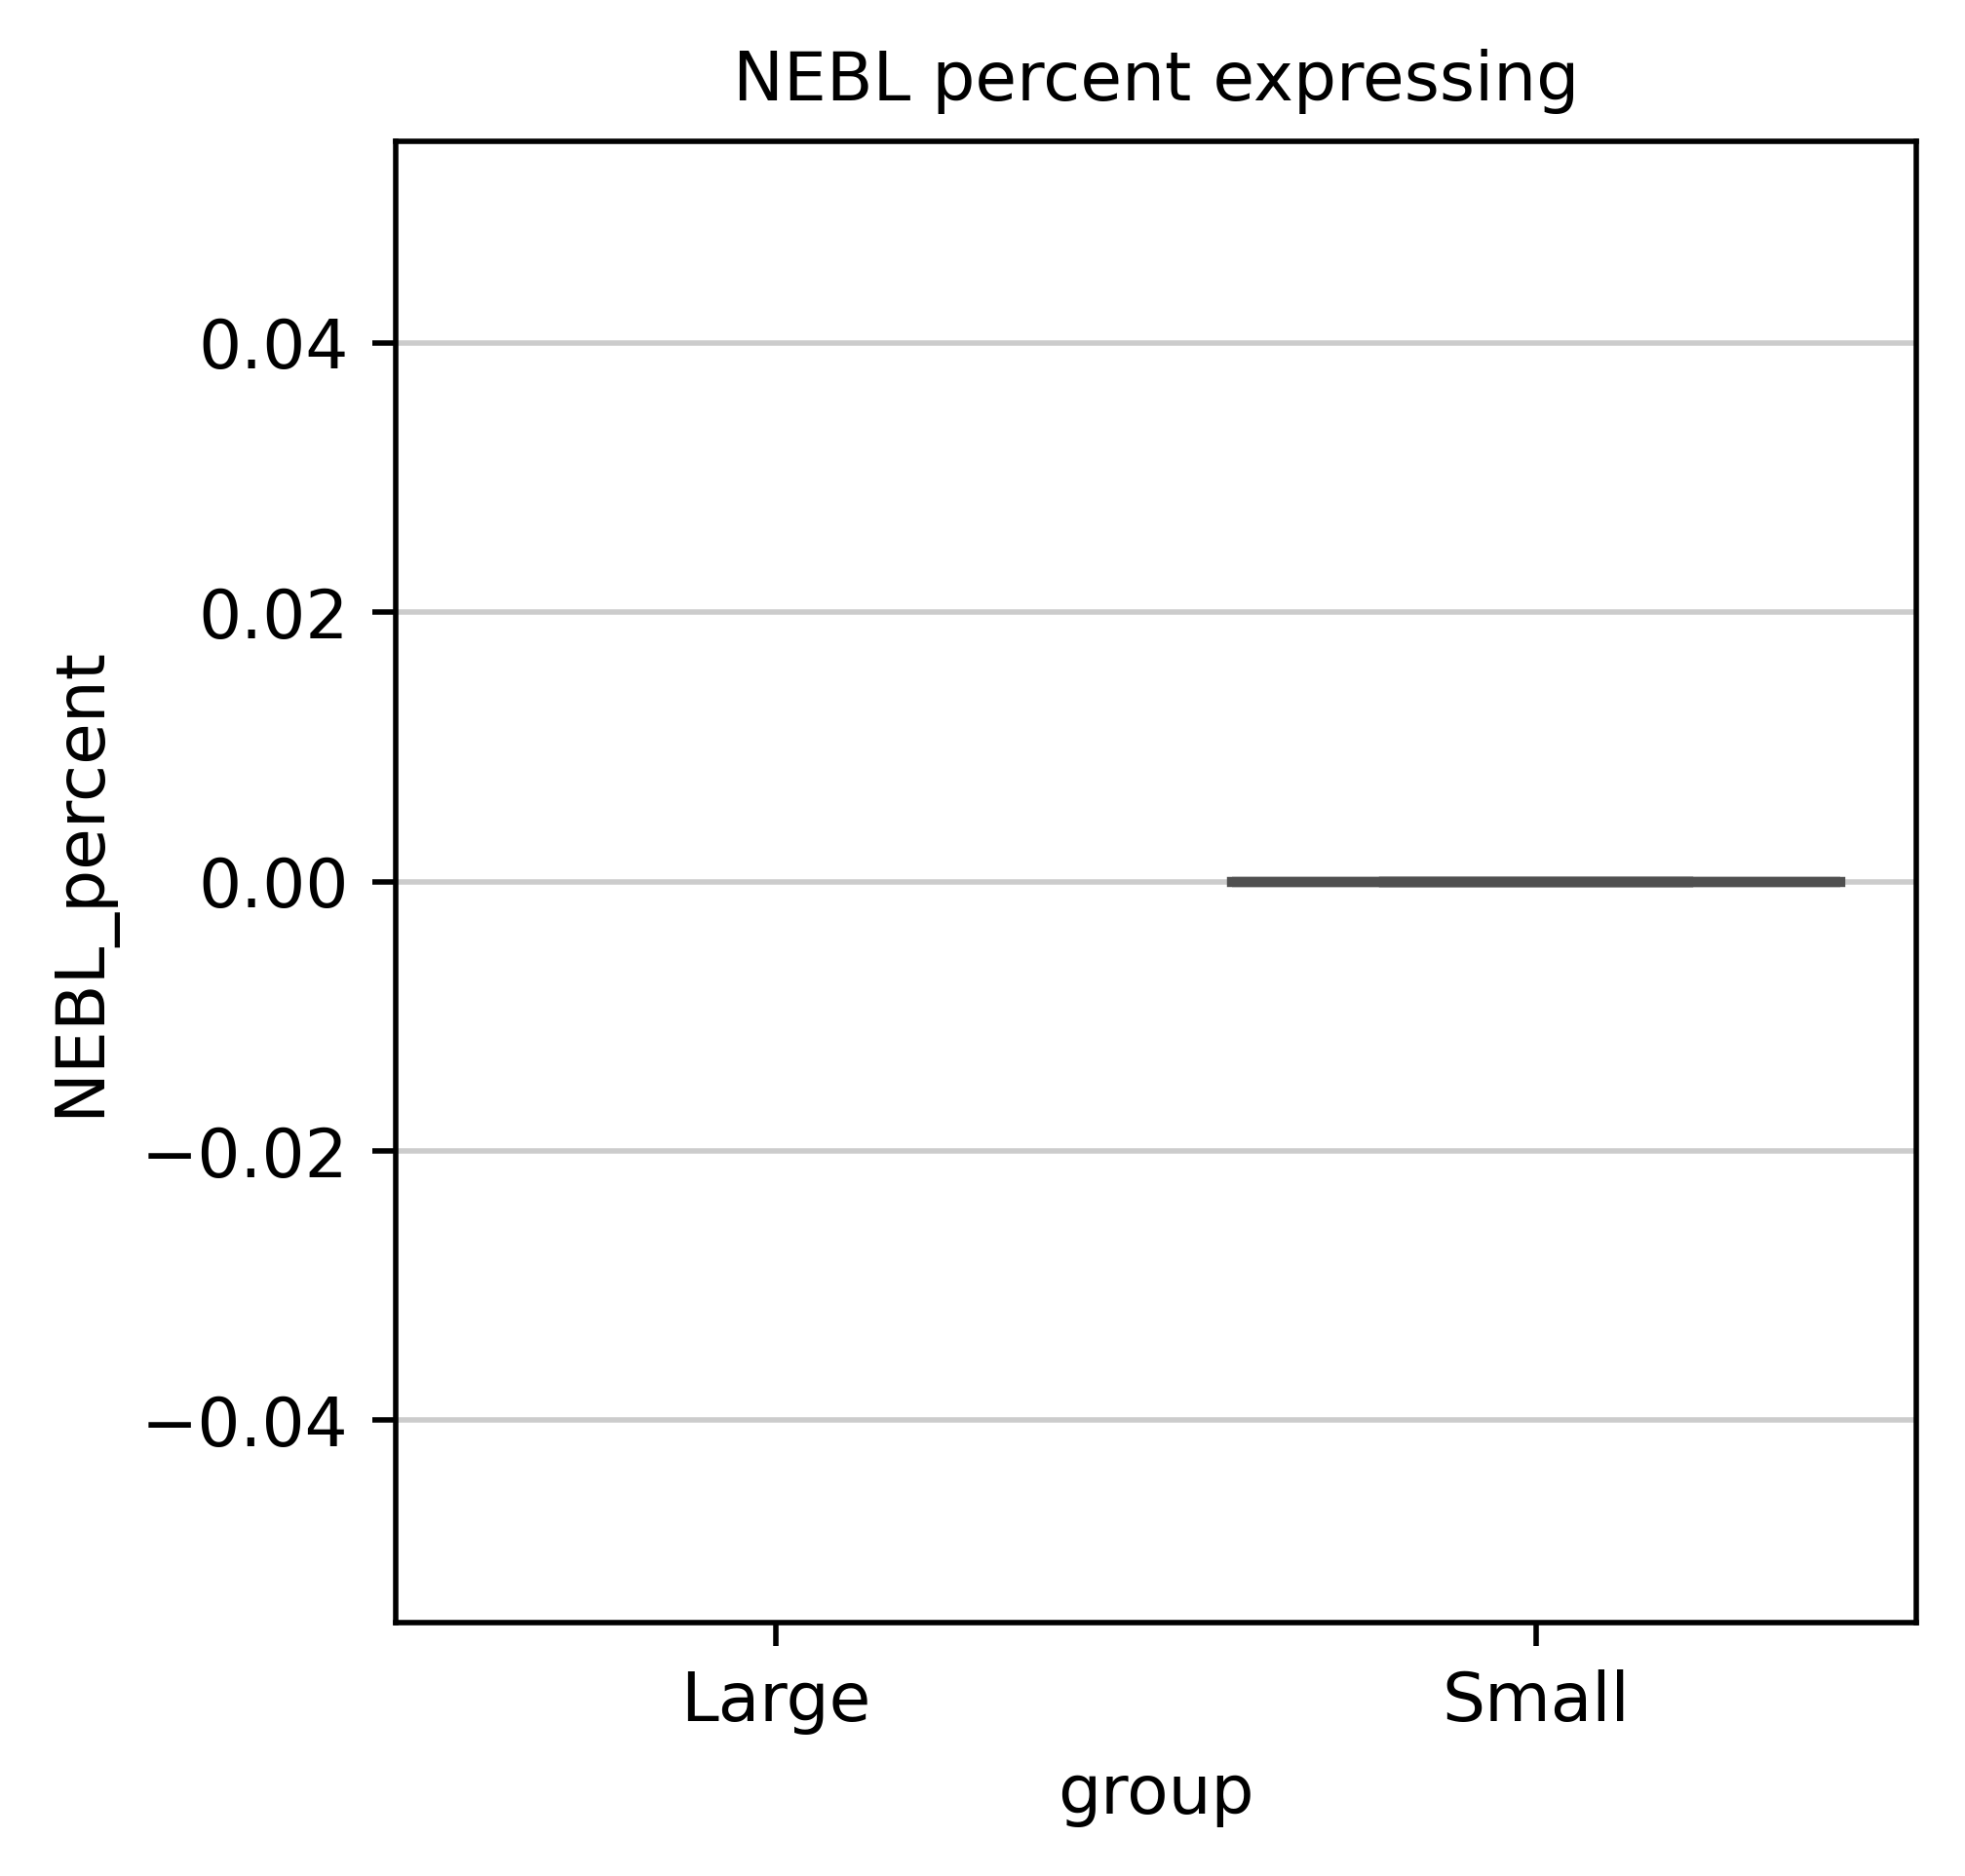

In [101]:
sns.boxplot(data = results2, x = "group", y = "NEBL_percent", palette = 'Reds', order = ['Large','Small']).set(title='NEBL percent expressing')

[Text(0.5, 1.0, 'SULF1+NEBL percent expressing')]

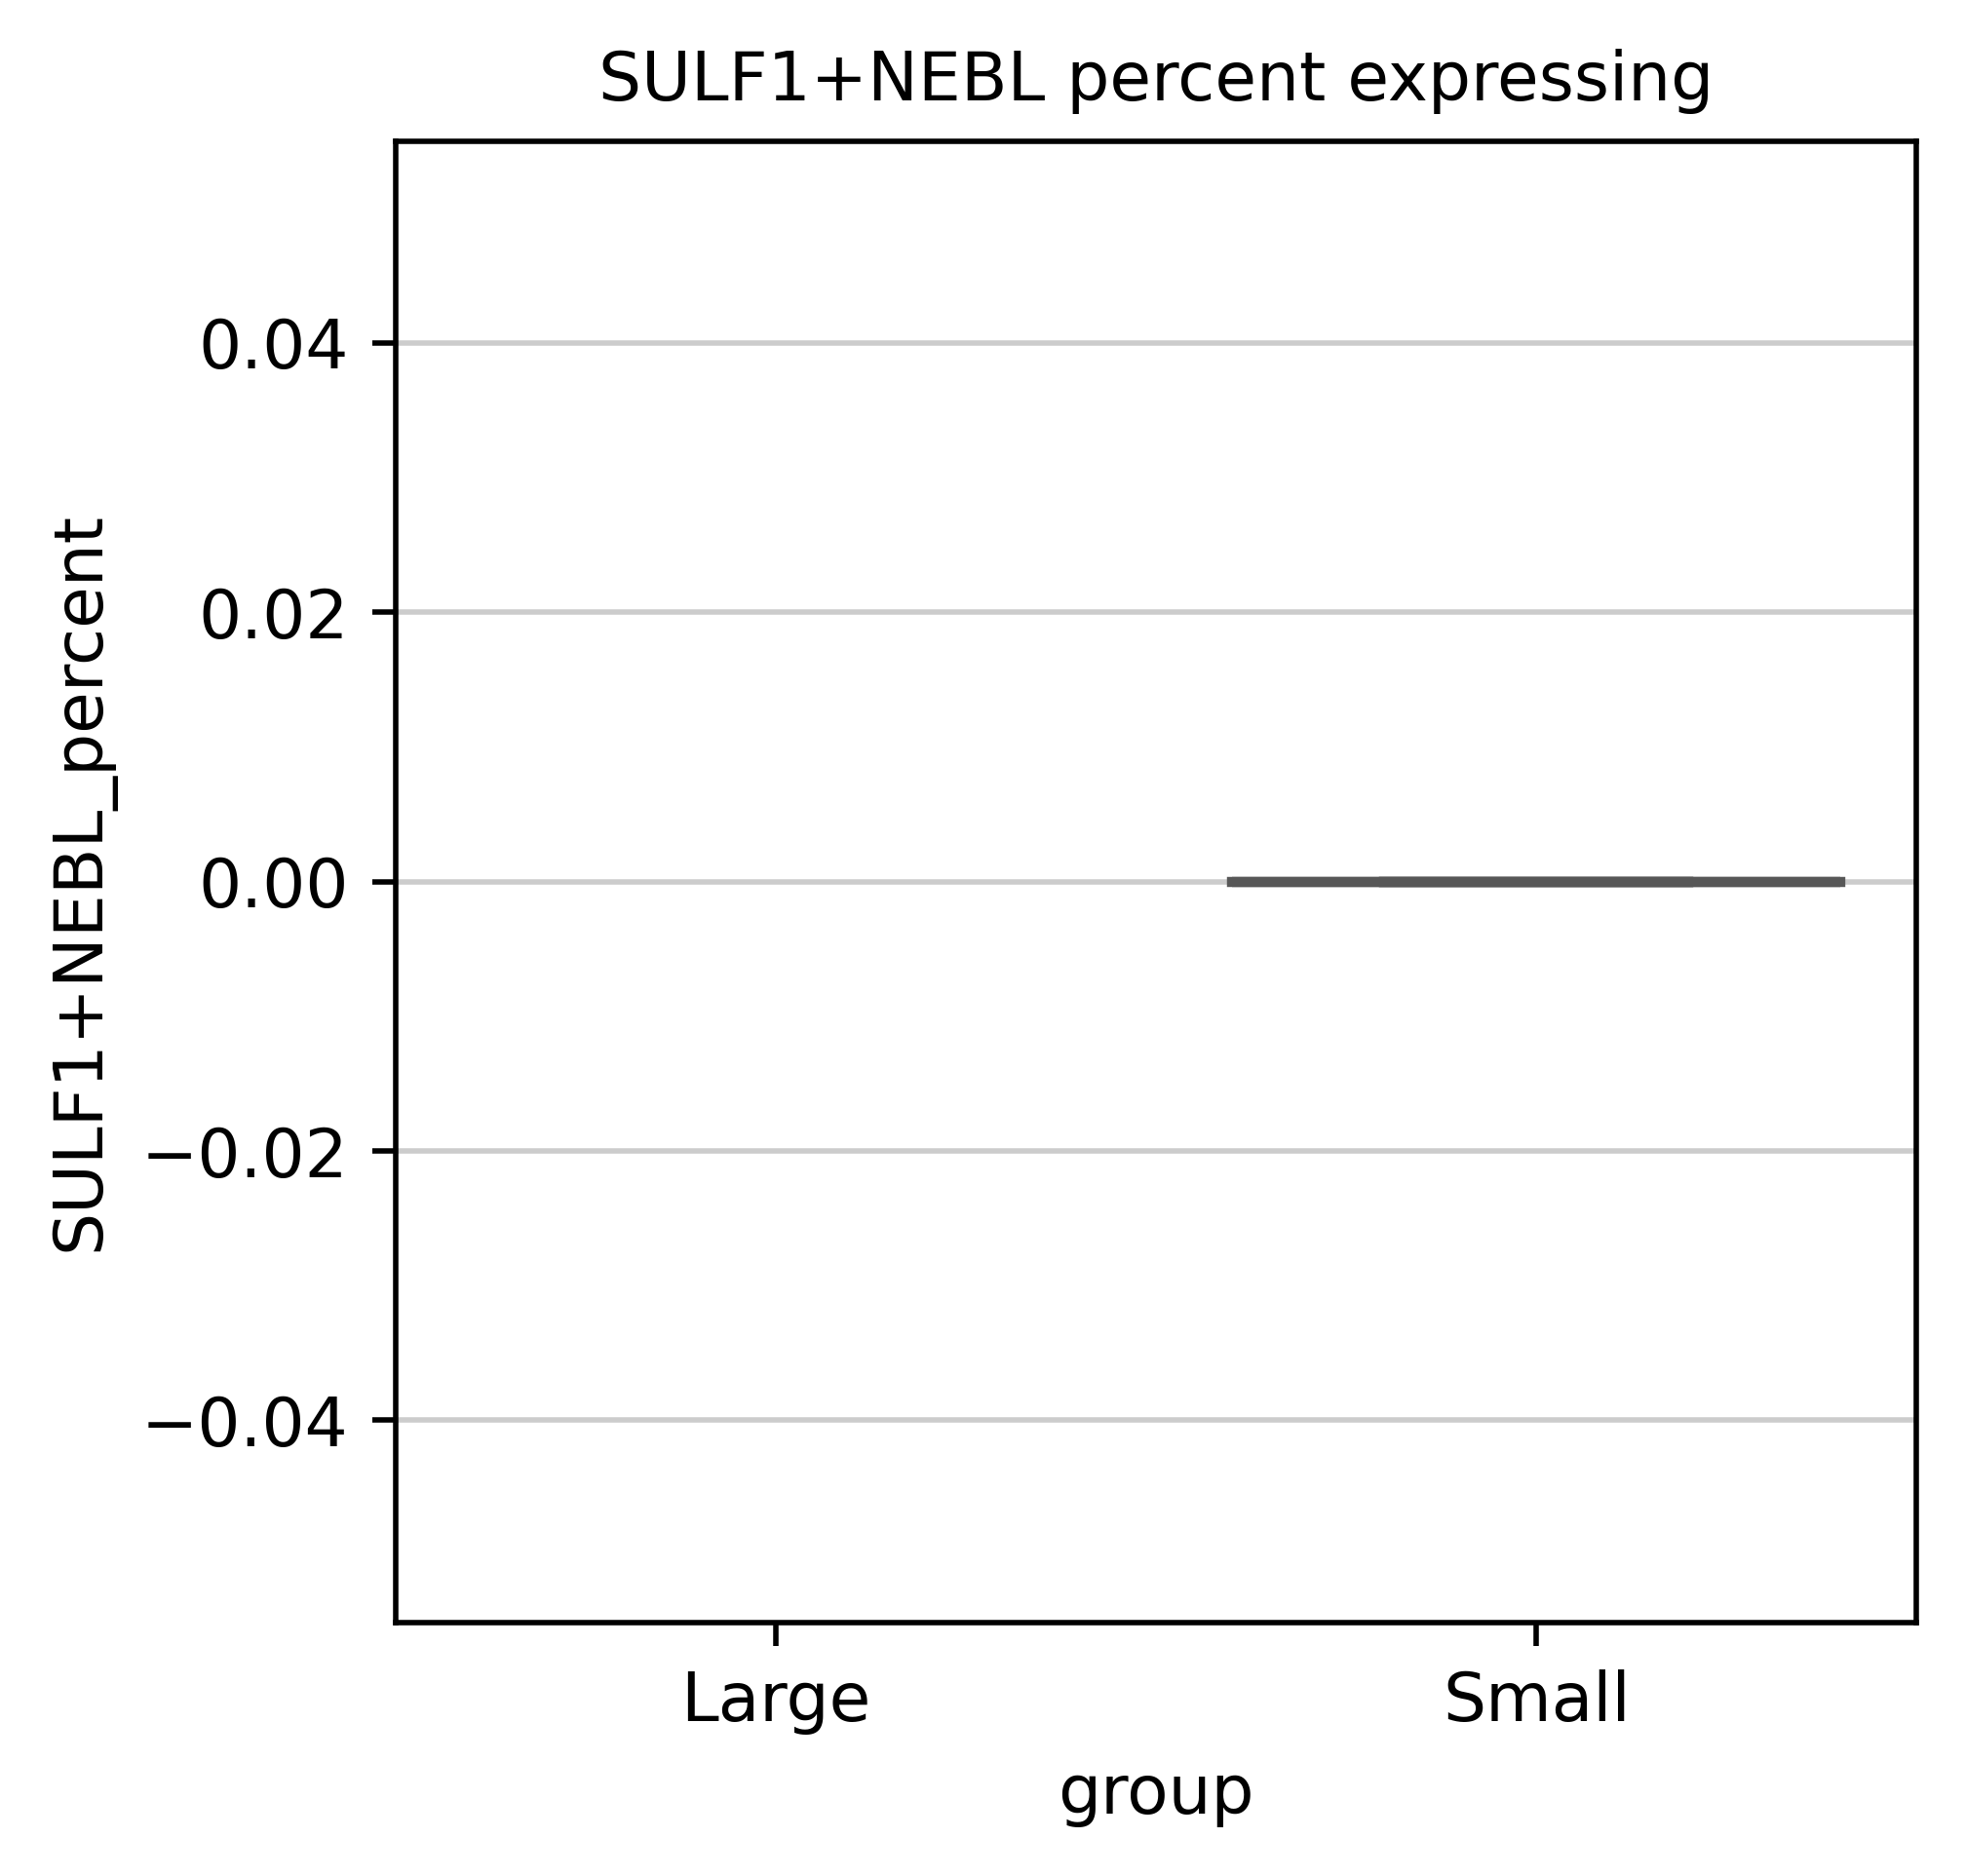

In [102]:
sns.boxplot(data = results2, x = "group", y = "SULF1+NEBL_percent", palette = 'Purples', order = ['Large','Small']).set(title='SULF1+NEBL percent expressing')

In [ ]:
### calculate mean / group

In [ ]:
results3 = results2.groupby("group").mean()

In [ ]:
results3["ROI"] = 'd2-1'

In [ ]:
results3

In [ ]:
markers = ["VWF","GJA5","SEMA3G","SULF1","NEBL","RGCC"]
sc.pl.dotplot(adata_aec_subset, markers, "Artery_clusters", mean_only_expressed = True)
#sc.pl.dotplot(adata_aec_subset, markers, "Artery_clusters", mean_only_expressed = False)

In [ ]:
sc.pl.spatial(adata_aec_subset,color="Artery_clusters",img_key='WGA',size=8, alpha_img = 0.2)